## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 1.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matp

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imblearn==0.12.0 xgboost==2.0.3 -q --user
# !pip install --upgrade -q threadpoolctl

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
churn = pd.read_csv("/content/BankChurners.csv")

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [ ]:
# Checking the number of rows and columns in the training data
churn.shape ##  Complete the code to view dimensions of the train data

(10127, 21)

In [ ]:
# let's create a copy of the data
data = churn.copy()

### Displaying the first few rows of the dataset

In [ ]:
# let's view the first 5 rows of the data
data.head() ##  Complete the code to view top 5 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [ ]:
# let's view the last 5 rows of the data
data.tail() ##  Complete the code to view last 5 rows of the data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


### Checking the data types of the columns for the dataset

In [ ]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

There are a total of 29 columns and 10,127 observations in the dataset
There are columns have less than 10,127 non-null values i.e. columns have missing values.


### Checking for duplicate values

In [ ]:
# let's check for duplicate values in the data
data.duplicated().sum() ##  Complete the code to check duplicate entries in the data

0

There are no duplicates in the onservations.

```
# This is formatted as code
```



### Checking for missing values

In [ ]:
# let's check for missing values in the data
#data.isnull().sum() ##  Complete the code to check missing entries in the train data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

,0
CLIENTNUM,0.000
Attrition_Flag,0.000
Customer_Age,0.000
Gender,0.000
Dependent_count,0.000
Education_Level,15.000
Marital_Status,7.400
Income_Category,0.000
Card_Category,0.000
Months_on_book,0.000


Education level coulmn has 15% missing values out of the total observations.
Marital Staus column has 7.4% missing values out of the total observations.
We will impute these values after splitting the data into train,validation and test sets.

### Statistical summary of the dataset

In [ ]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T ##  Complete the code to print the statitical summary of the train data

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


The dataset contains a diverse range of customer profiles, with variations in credit limits, transaction amounts, and utilization ratios.

Most customers are middle-aged, with a mean age of around 46 years.

Customers typically have around 2 dependents and hold about 3 to 4 products with the bank.

There is a significant range in credit limits and revolving balances, reflecting different financial behaviors and profiles.

The average card utilization ratio indicates how much of the available credit is being used, which can be useful for understanding spending and credit behaviors.

In [ ]:
data.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [ ]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Attrition_Flag are :
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
**************************************************
Unique values in Gender are :
Gender
F    5358
M    4769
Name: count, dtype: int64
**************************************************
Unique values in Education_Level are :
Education_Level
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
**************************************************
Unique values in Marital_Status are :
Marital_Status
Married     4687
Single      3943
Divorced     748
Name: count, dtype: int64
**************************************************
Unique values in Income_Category are :
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64
********************

In [ ]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
data.drop(["CLIENTNUM"], axis=1, inplace=True)

In [ ]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
data["Attrition_Flag"].replace("Existing Customer", 0, inplace=True)
data["Attrition_Flag"].replace("Attrited Customer", 1, inplace=True)

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate analysis

`Customer_Age`

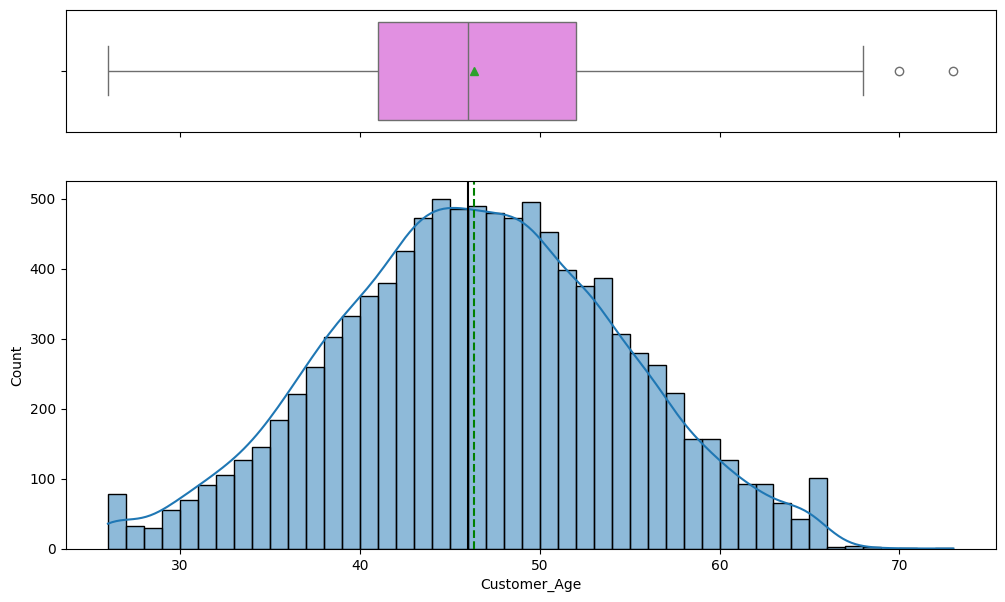

In [ ]:
histogram_boxplot(data, "Customer_Age", kde=True)

`Months_on_book`

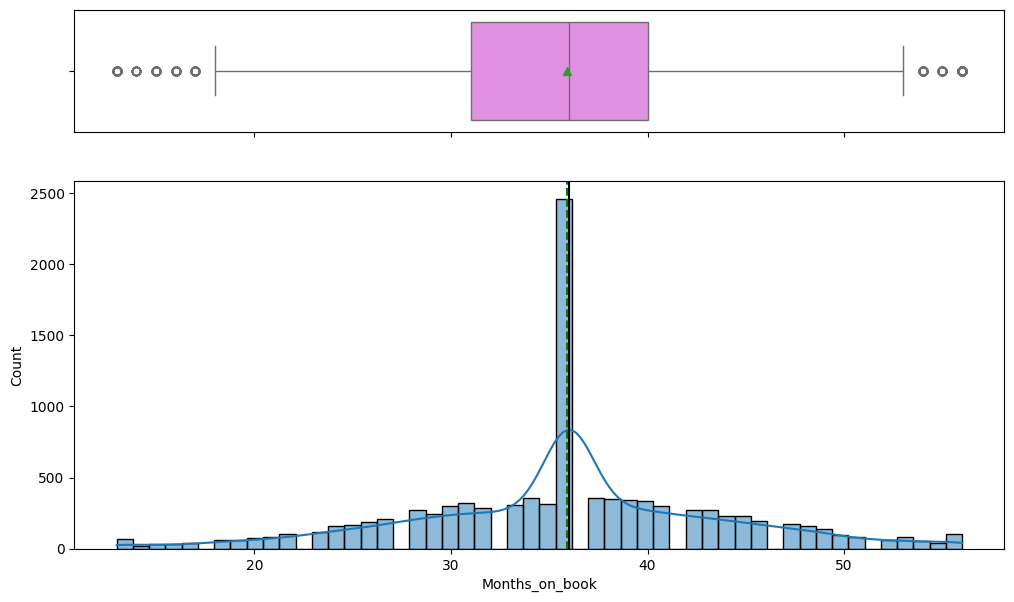

In [ ]:
histogram_boxplot(data , "Months_on_book" , kde= True)
## Complete the code to create histogram_boxplot for 'New_Price'

`Credit_Limit`

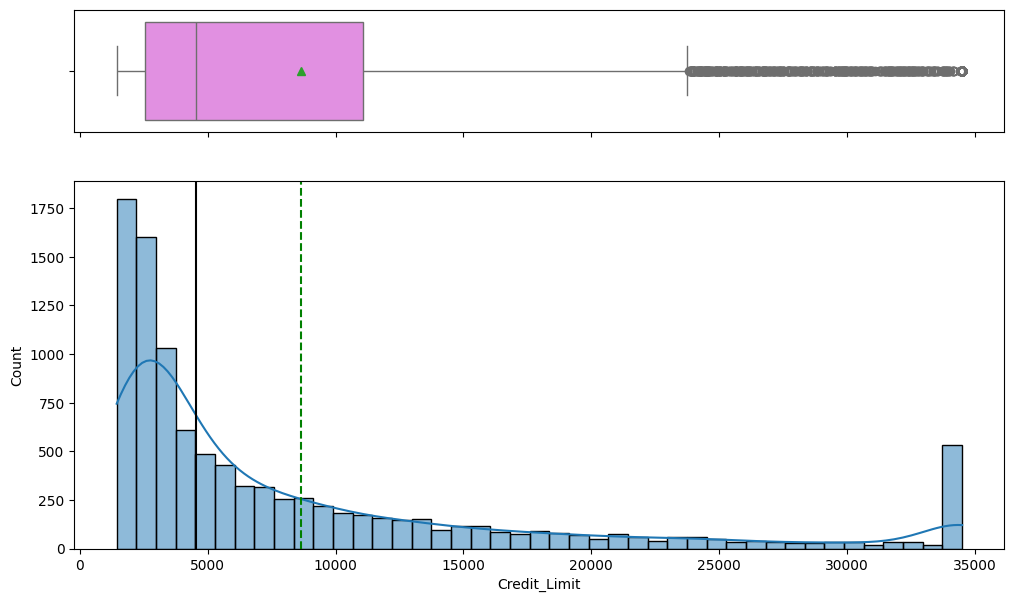

In [ ]:
histogram_boxplot(data, "Credit_Limit", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

`Total_Revolving_Bal`

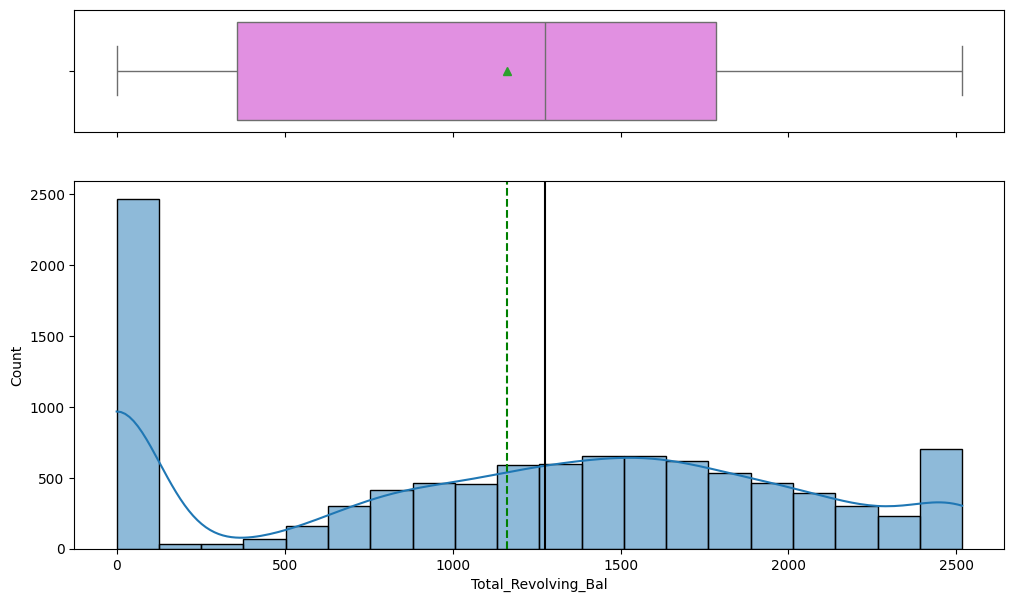

In [ ]:
histogram_boxplot(data, "Total_Revolving_Bal", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

`Avg_Open_To_Buy`

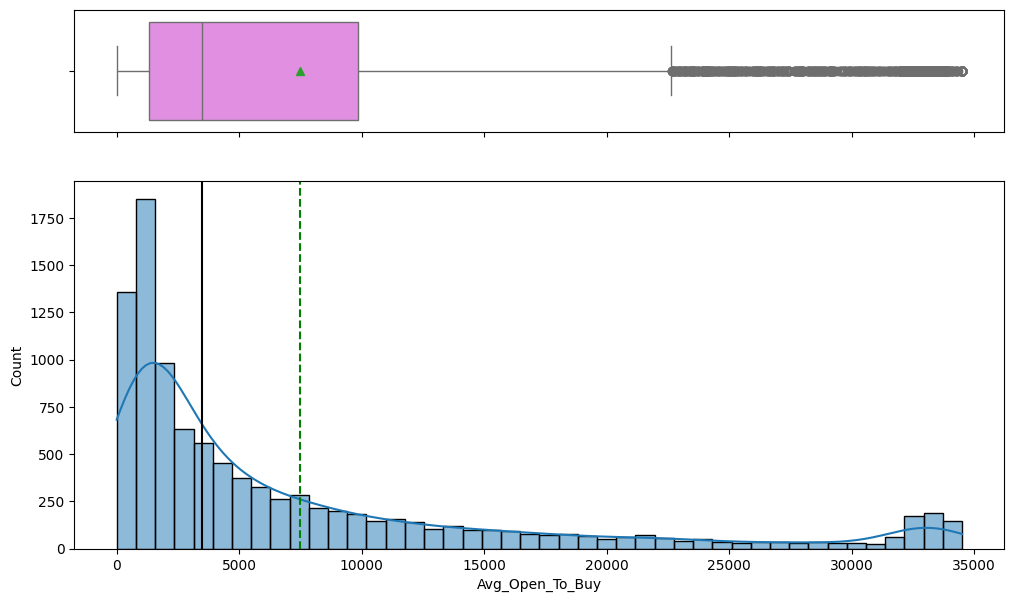

In [ ]:
histogram_boxplot(data, "Avg_Open_To_Buy", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

`Total_Trans_Ct`

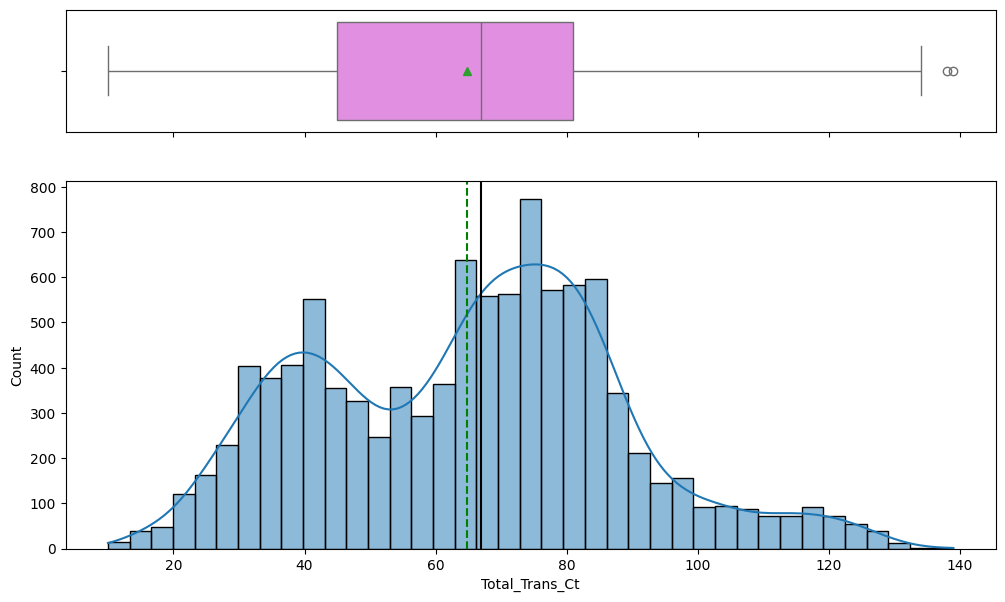

In [ ]:
histogram_boxplot(data, "Total_Trans_Ct", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

`Total_Amt_Chng_Q4_Q1`

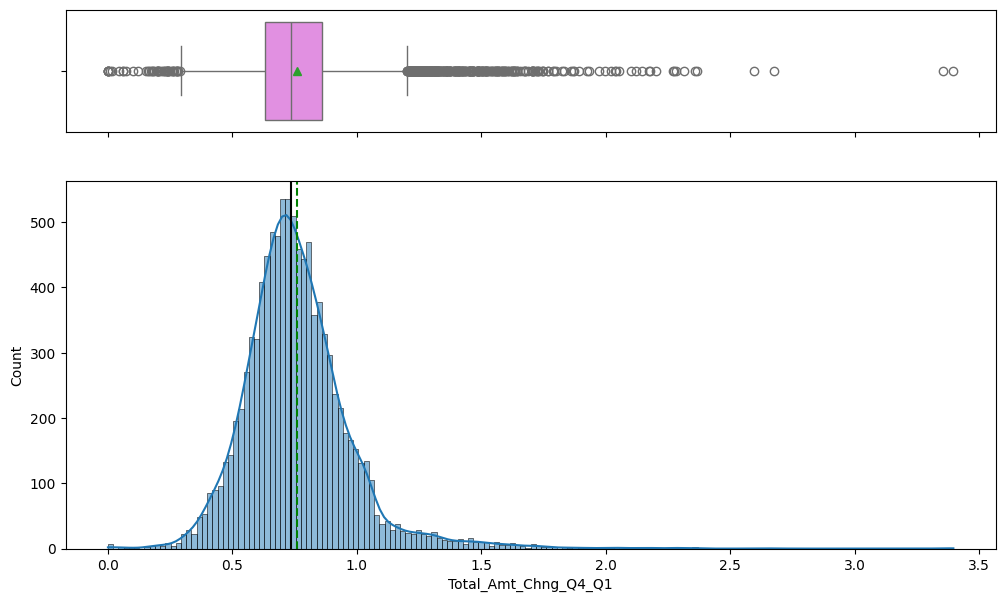

In [ ]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

**Let's see total transaction amount distributed**

`Total_Trans_Amt`

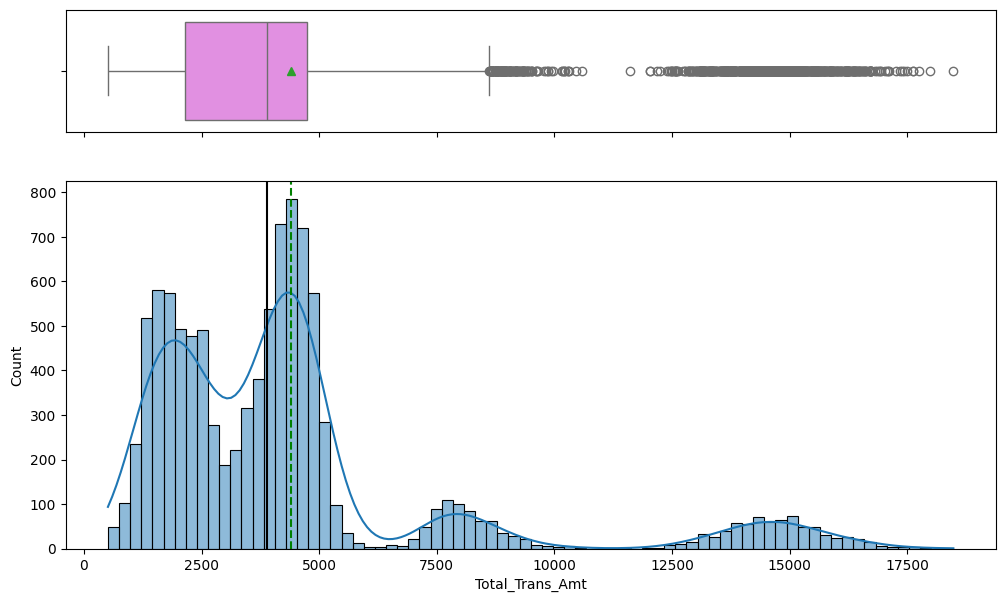

In [ ]:
histogram_boxplot(data, "Total_Trans_Amt", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

`Total_Ct_Chng_Q4_Q1`

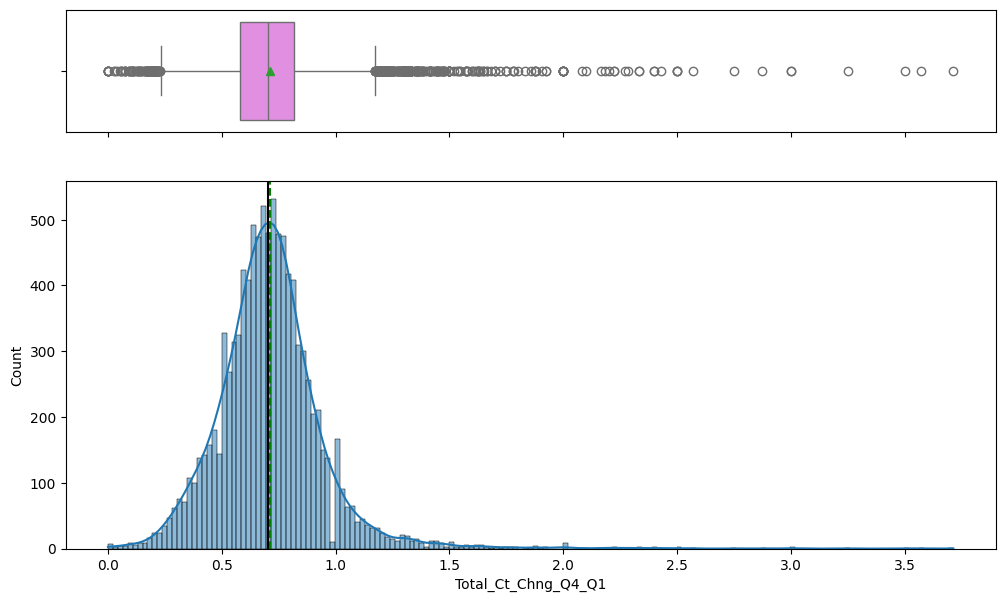

In [ ]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

`Avg_Utilization_Ratio`

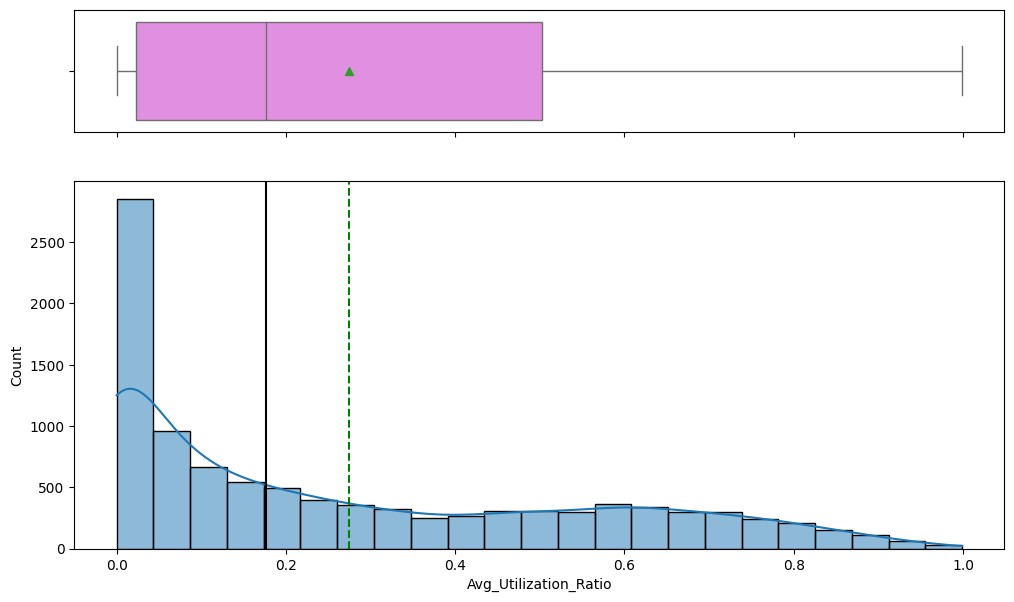

In [ ]:
histogram_boxplot(data, "Avg_Utilization_Ratio", kde=True)  ## Complete the code to create histogram_boxplot for 'New_Price'

`Dependent_count`

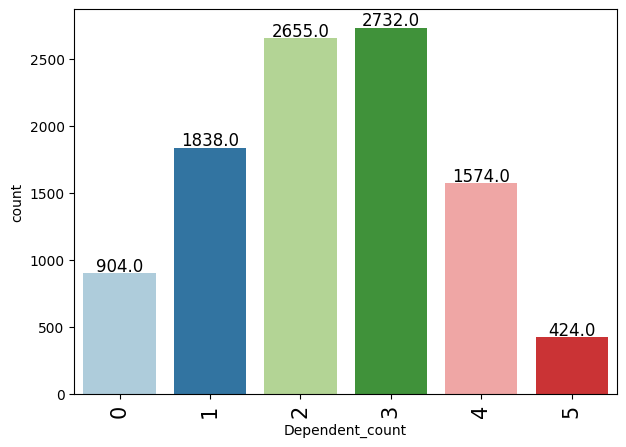

In [ ]:
labeled_barplot(data, "Dependent_count")

`Total_Relationship_Count`

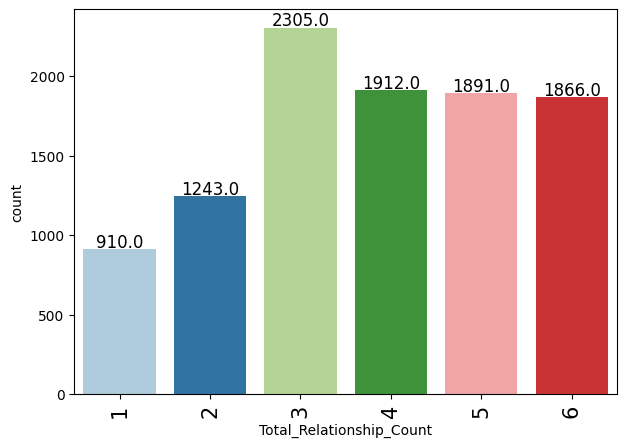

In [ ]:
labeled_barplot(data, "Total_Relationship_Count") ## Complete the code to create labeled_barplot for 'Total_Relationship_Count'

`Months_Inactive_12_mon`

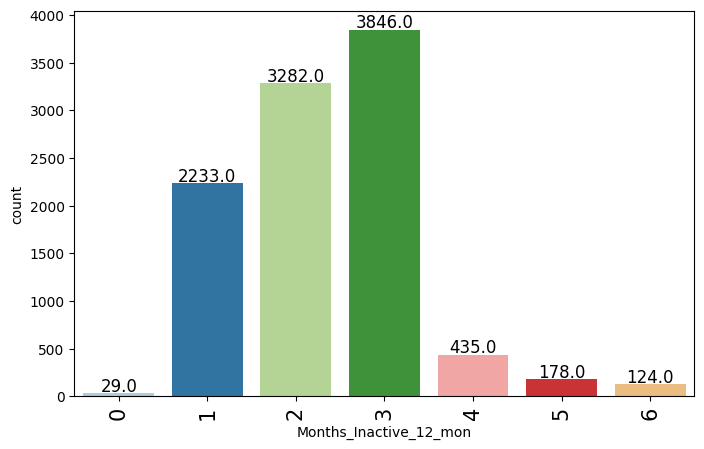

In [ ]:
labeled_barplot(data, "Months_Inactive_12_mon") ## Complete the code to create labeled_barplot for 'Months_Inactive_12_mon'

`Contacts_Count_12_mon`

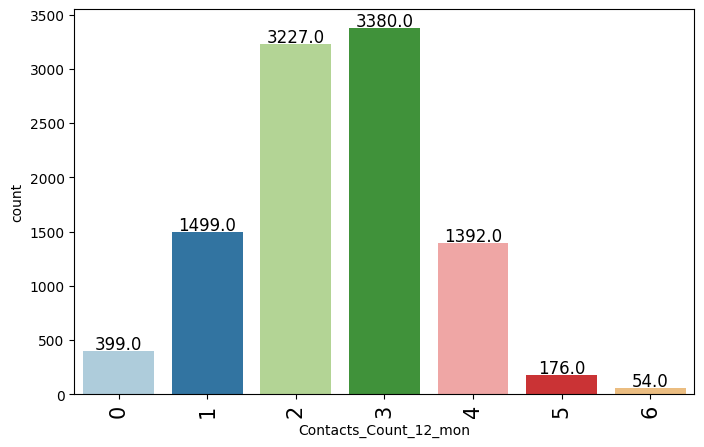

In [ ]:
labeled_barplot(data, "Contacts_Count_12_mon") ## Complete the code to create labeled_barplot for 'Contacts_Count_12_mon'

`Gender`

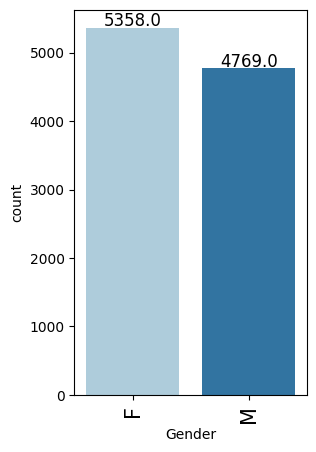

In [ ]:
labeled_barplot(data, "Gender") ## Complete the code to create labeled_barplot for 'Gender'

**Let's see the distribution of the level of education of customers**

`Education_Level`

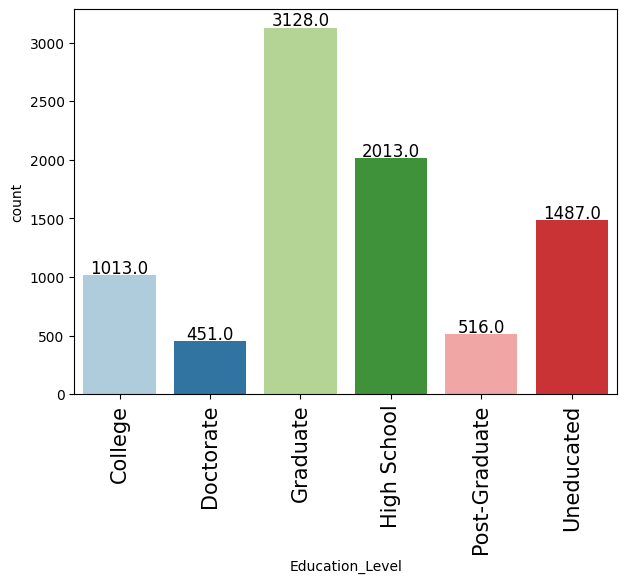

In [ ]:
labeled_barplot(data, "Education_Level") ## Complete the code to create labeled_barplot for 'Education_Level'

`Marital_Status`

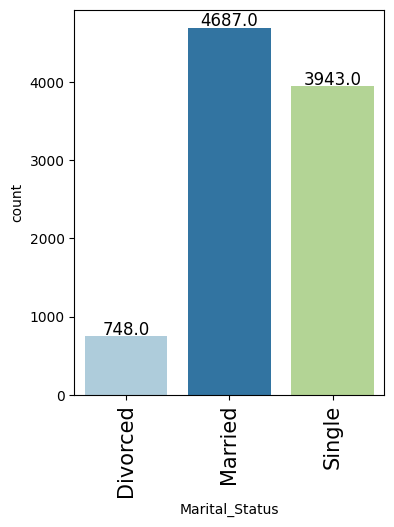

In [ ]:
labeled_barplot(data, "Marital_Status") ## Complete the code to create labeled_barplot for 'Marital_Status'

**Let's see the distribution of the level of income of customers**

`Income_Category`

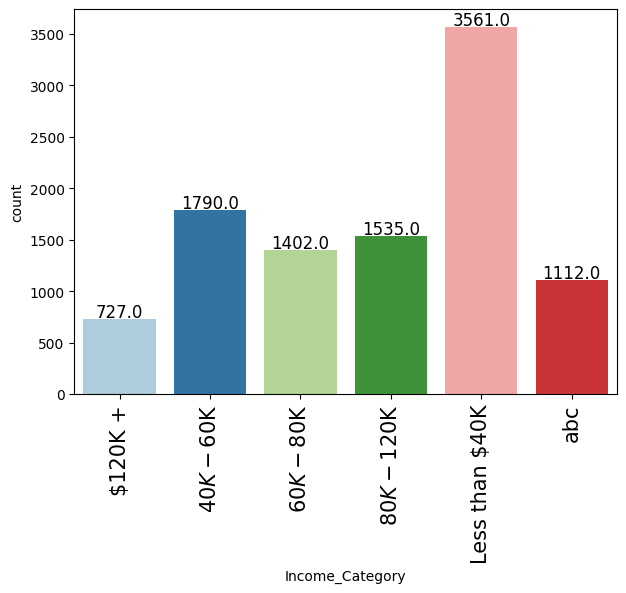

In [ ]:
labeled_barplot(data, "Income_Category") ## Complete the code to create labeled_barplot for 'Income_Category'

`Card_Category`

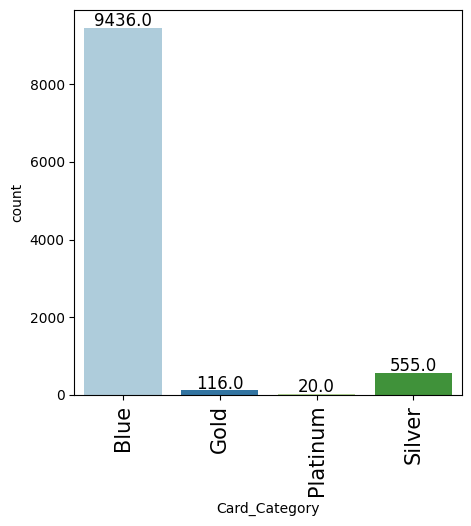

In [ ]:
labeled_barplot(data, "Card_Category") ## Complete the code to create labeled_barplot for 'Card_Category'

`Attrition_Flag`

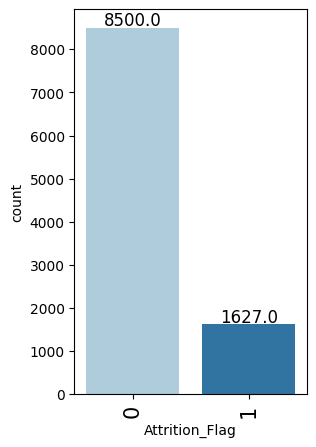

In [ ]:
labeled_barplot(data, "Attrition_Flag") ## Complete the code to create labeled_barplot for 'Attrition_Flag'

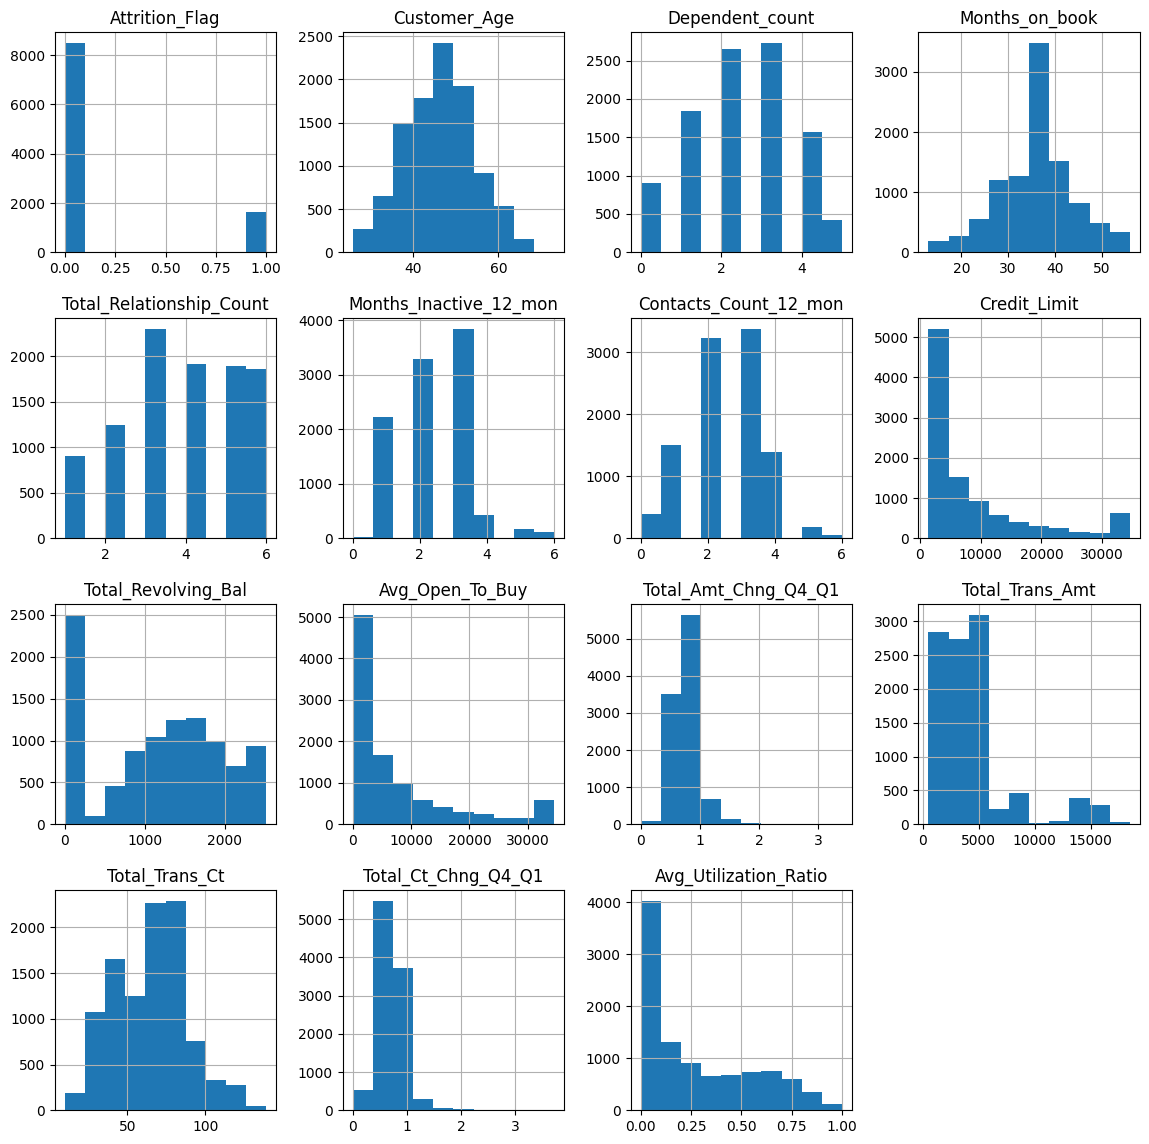

In [ ]:
# creating histograms
data.hist(figsize=(14, 14))
plt.show()

### Bivariate Distributions

**Let's see the attributes that have a strong correlation with each other**

**Correlation Check**

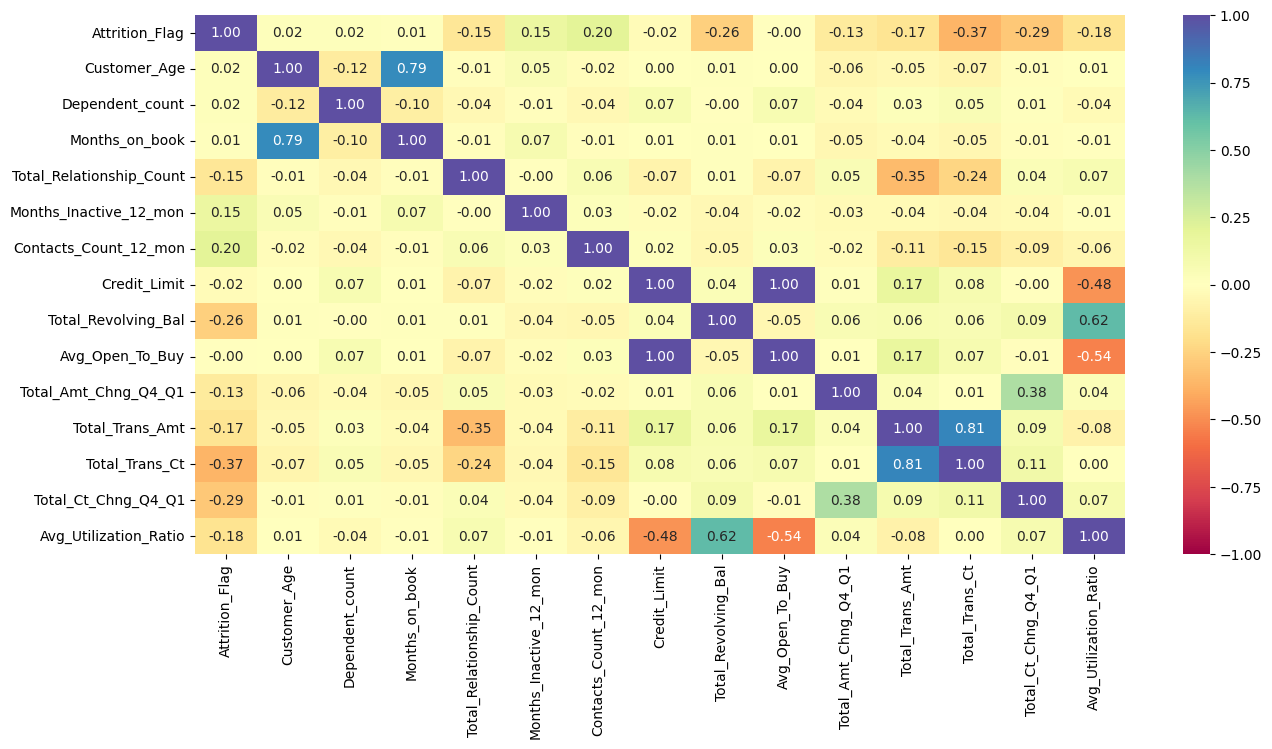

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

`Attrition_Flag vs Gender`

Attrition_Flag     0     1    All
Gender                           
All             8500  1627  10127
F               4428   930   5358
M               4072   697   4769
------------------------------------------------------------------------------------------------------------------------


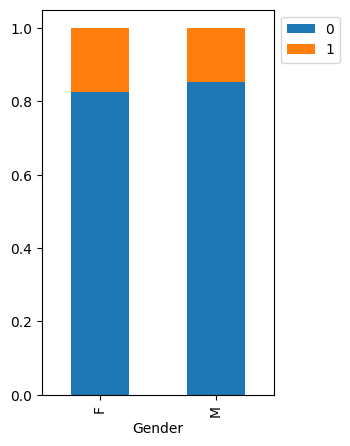

In [ ]:
stacked_barplot(data, "Gender", "Attrition_Flag")

`Attrition_Flag vs Marital_Status`

Attrition_Flag     0     1   All
Marital_Status                  
All             7880  1498  9378
Married         3978   709  4687
Single          3275   668  3943
Divorced         627   121   748
------------------------------------------------------------------------------------------------------------------------


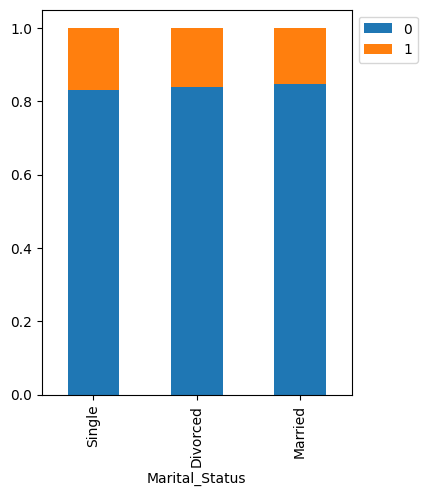

In [ ]:
stacked_barplot(data,"Marital_Status", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Marital_Status

`Attrition_Flag vs Education_Level`

Attrition_Flag      0     1   All
Education_Level                  
All              7237  1371  8608
Graduate         2641   487  3128
High School      1707   306  2013
Uneducated       1250   237  1487
College           859   154  1013
Doctorate         356    95   451
Post-Graduate     424    92   516
------------------------------------------------------------------------------------------------------------------------


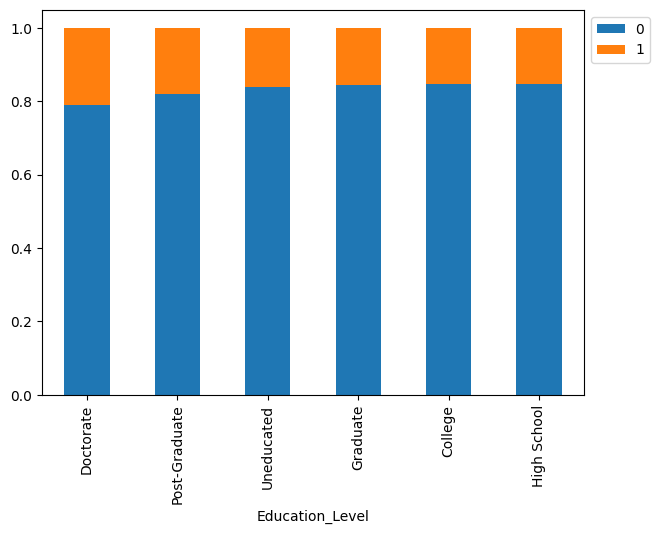

In [ ]:
stacked_barplot(data,"Education_Level", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Education_Level

`Attrition_Flag vs Income_Category`

Attrition_Flag      0     1    All
Income_Category                   
All              8500  1627  10127
Less than $40K   2949   612   3561
$40K - $60K      1519   271   1790
$80K - $120K     1293   242   1535
$60K - $80K      1213   189   1402
abc               925   187   1112
$120K +           601   126    727
------------------------------------------------------------------------------------------------------------------------


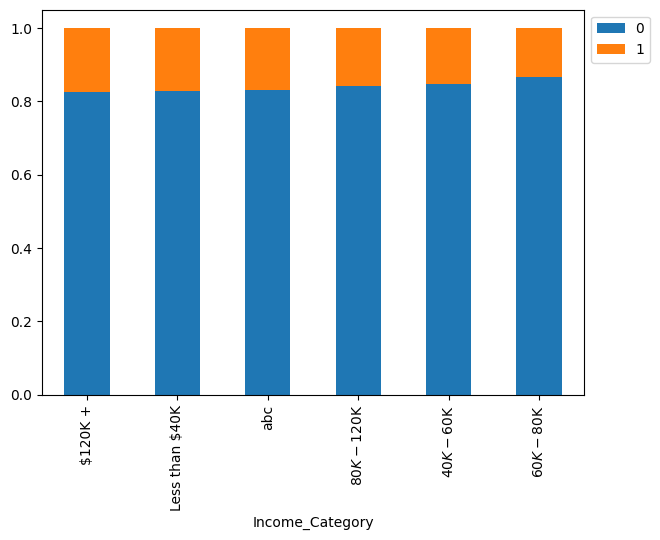

In [ ]:
stacked_barplot(data,"Income_Category", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Income_Category

`Attrition_Flag vs Contacts_Count_12_mon`

Attrition_Flag            0     1    All
Contacts_Count_12_mon                   
All                    8500  1627  10127
3                      2699   681   3380
2                      2824   403   3227
4                      1077   315   1392
1                      1391   108   1499
5                       117    59    176
6                         0    54     54
0                       392     7    399
------------------------------------------------------------------------------------------------------------------------


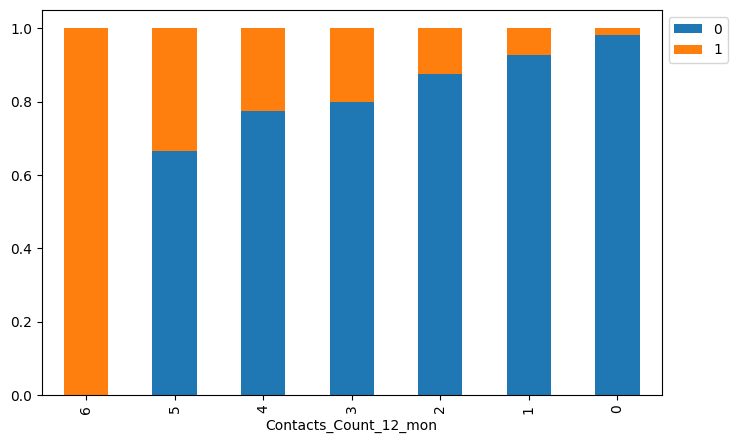

In [ ]:
stacked_barplot(data,"Contacts_Count_12_mon", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Income_Category

**Let's see the number of months a customer was inactive in the last 12 months (Months_Inactive_12_mon) vary by the customer's account status (Attrition_Flag)**

`Attrition_Flag vs Months_Inactive_12_mon`

Attrition_Flag             0     1    All
Months_Inactive_12_mon                   
All                     8500  1627  10127
3                       3020   826   3846
2                       2777   505   3282
4                        305   130    435
1                       2133   100   2233
5                        146    32    178
6                        105    19    124
0                         14    15     29
------------------------------------------------------------------------------------------------------------------------


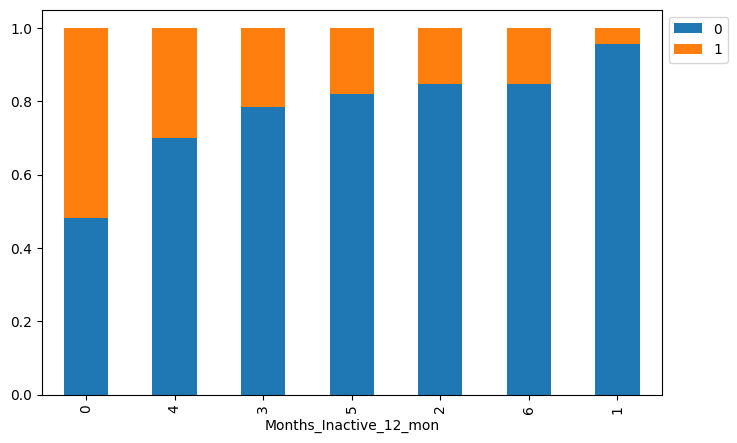

In [ ]:
stacked_barplot(data,"Months_Inactive_12_mon", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_Inactive_12_mon

`Attrition_Flag vs Total_Relationship_Count`

Attrition_Flag               0     1    All
Total_Relationship_Count                   
All                       8500  1627  10127
3                         1905   400   2305
2                          897   346   1243
1                          677   233    910
5                         1664   227   1891
4                         1687   225   1912
6                         1670   196   1866
------------------------------------------------------------------------------------------------------------------------


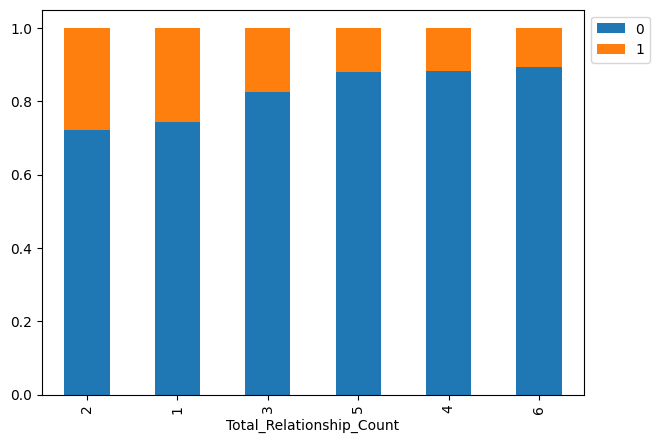

In [ ]:
stacked_barplot(data,"Total_Relationship_Count", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Relationship_Count

`Attrition_Flag vs Dependent_count`

Attrition_Flag      0     1    All
Dependent_count                   
All              8500  1627  10127
3                2250   482   2732
2                2238   417   2655
1                1569   269   1838
4                1314   260   1574
0                 769   135    904
5                 360    64    424
------------------------------------------------------------------------------------------------------------------------


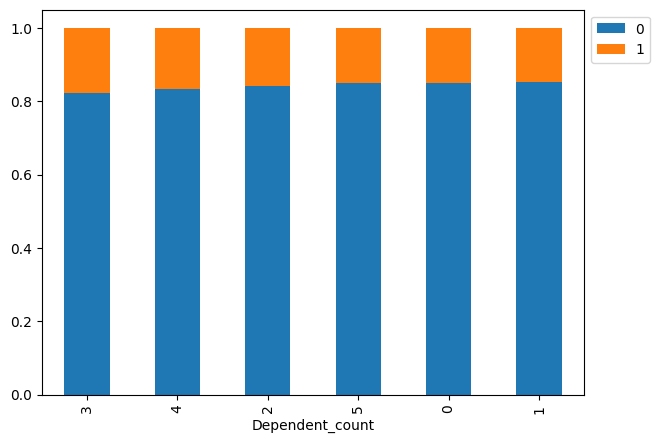

In [ ]:
stacked_barplot(data,"Dependent_count", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Dependent_count

`Total_Revolving_Bal` vs `Attrition_Flag`

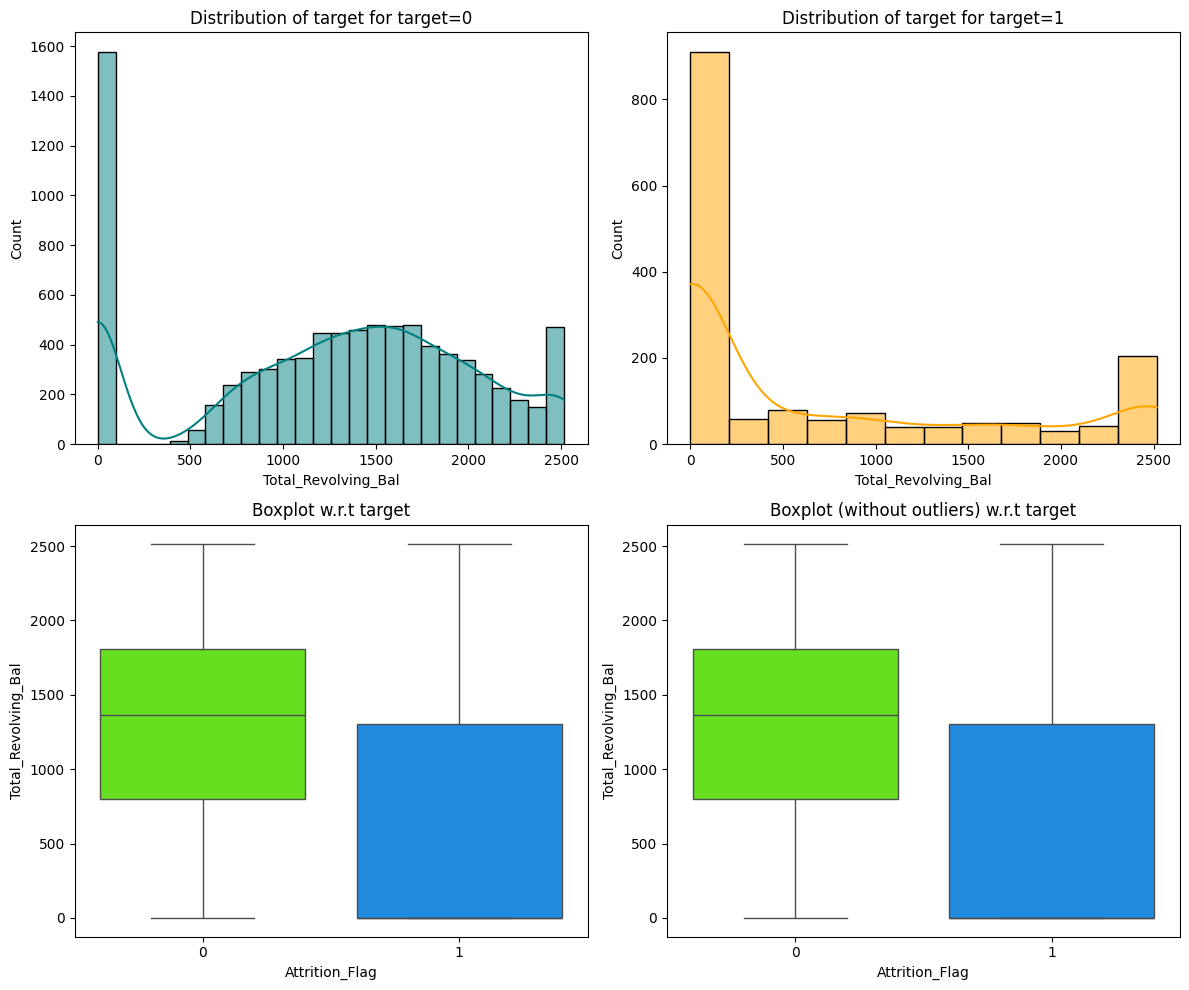

In [ ]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

`Attrition_Flag vs Credit_Limit`

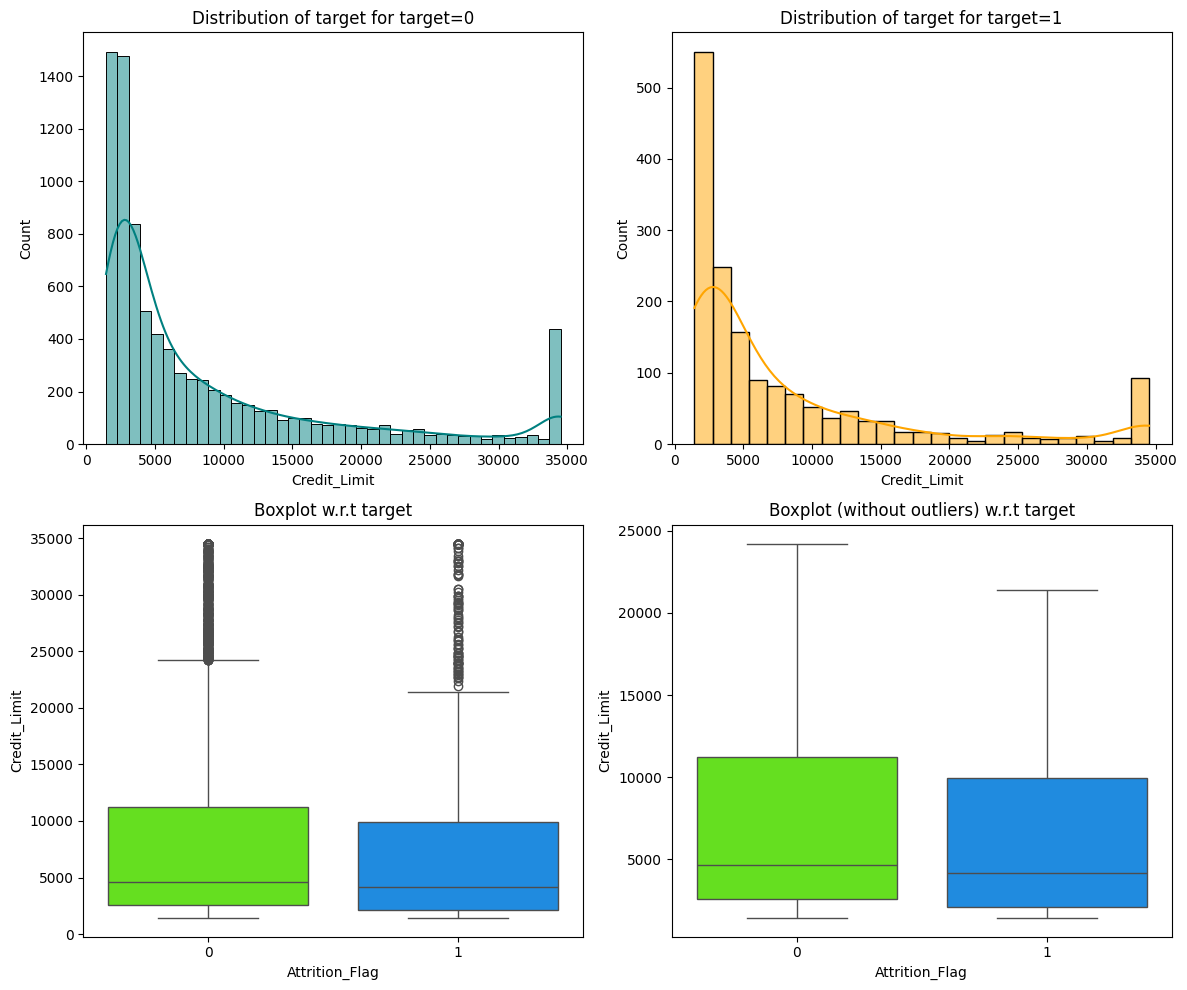

In [ ]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Credit_Limit

`Attrition_Flag vs Customer_Age`

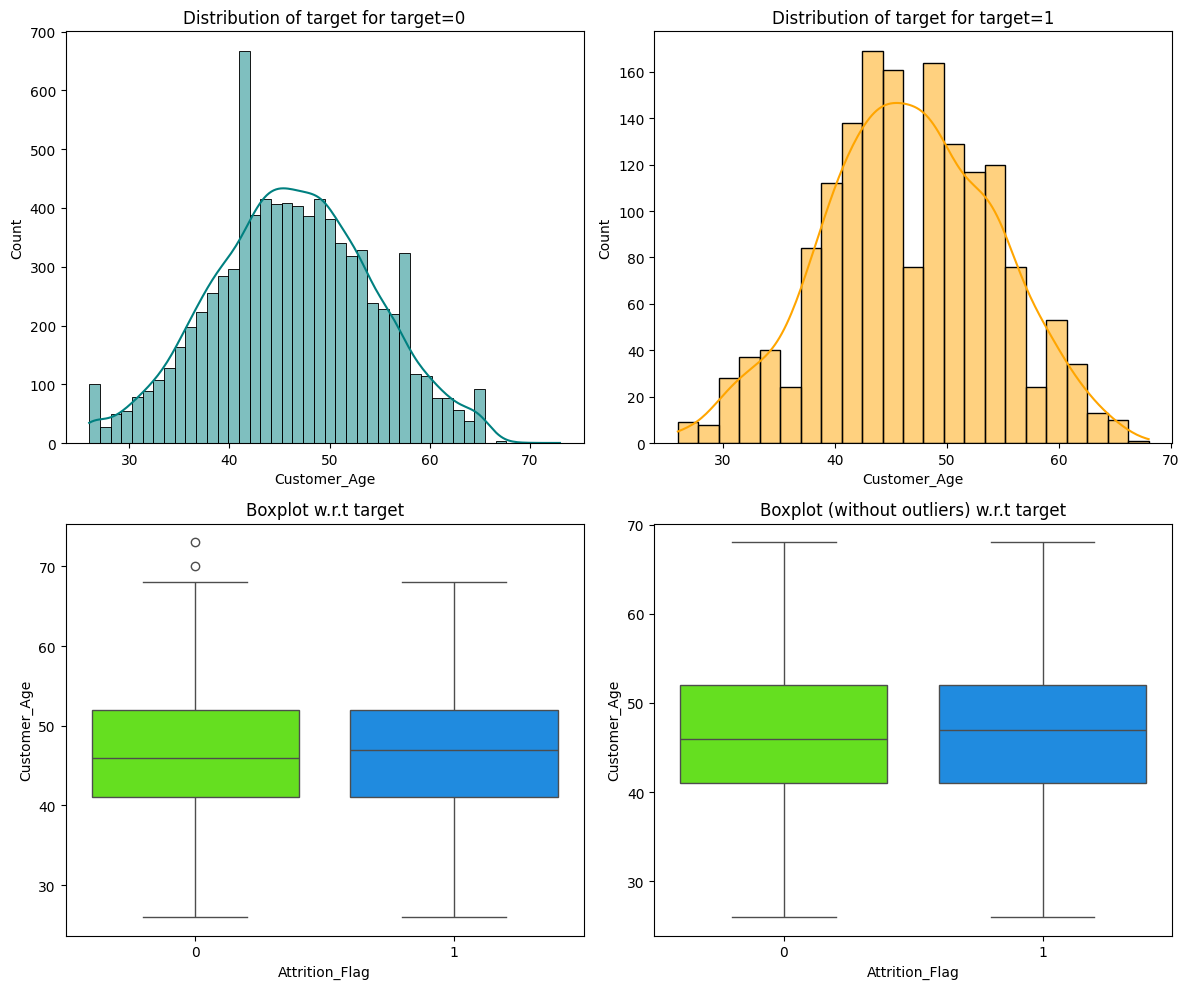

In [ ]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Customer_Age

`Total_Trans_Ct` vs `Attrition_Flag`

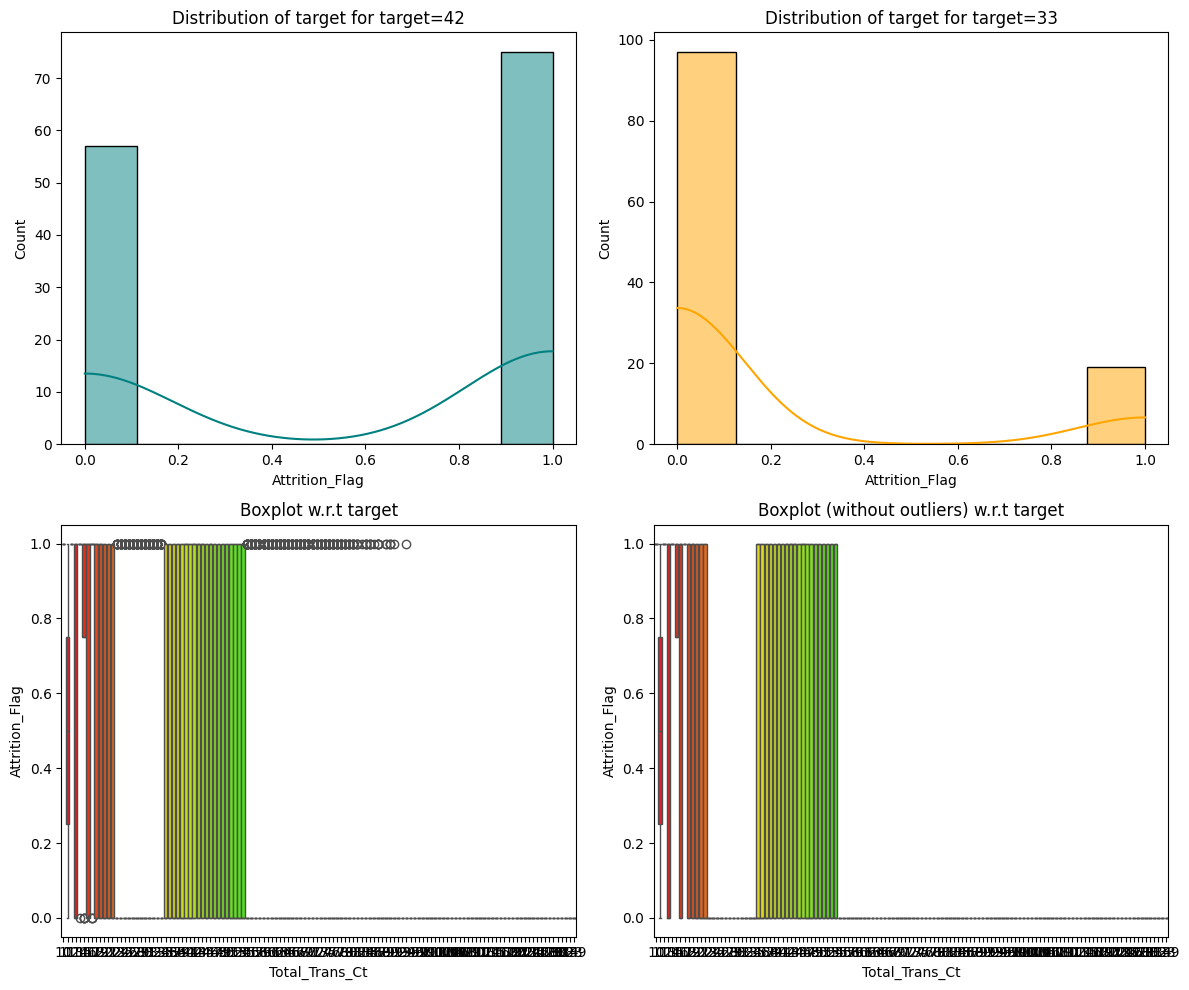

In [ ]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Total_Trans_Ct") ## Complete the code to create distribution_plot for Total_Trans_Ct vs Attrition_Flag

`Total_Trans_Amt` vs `Attrition_Flag`

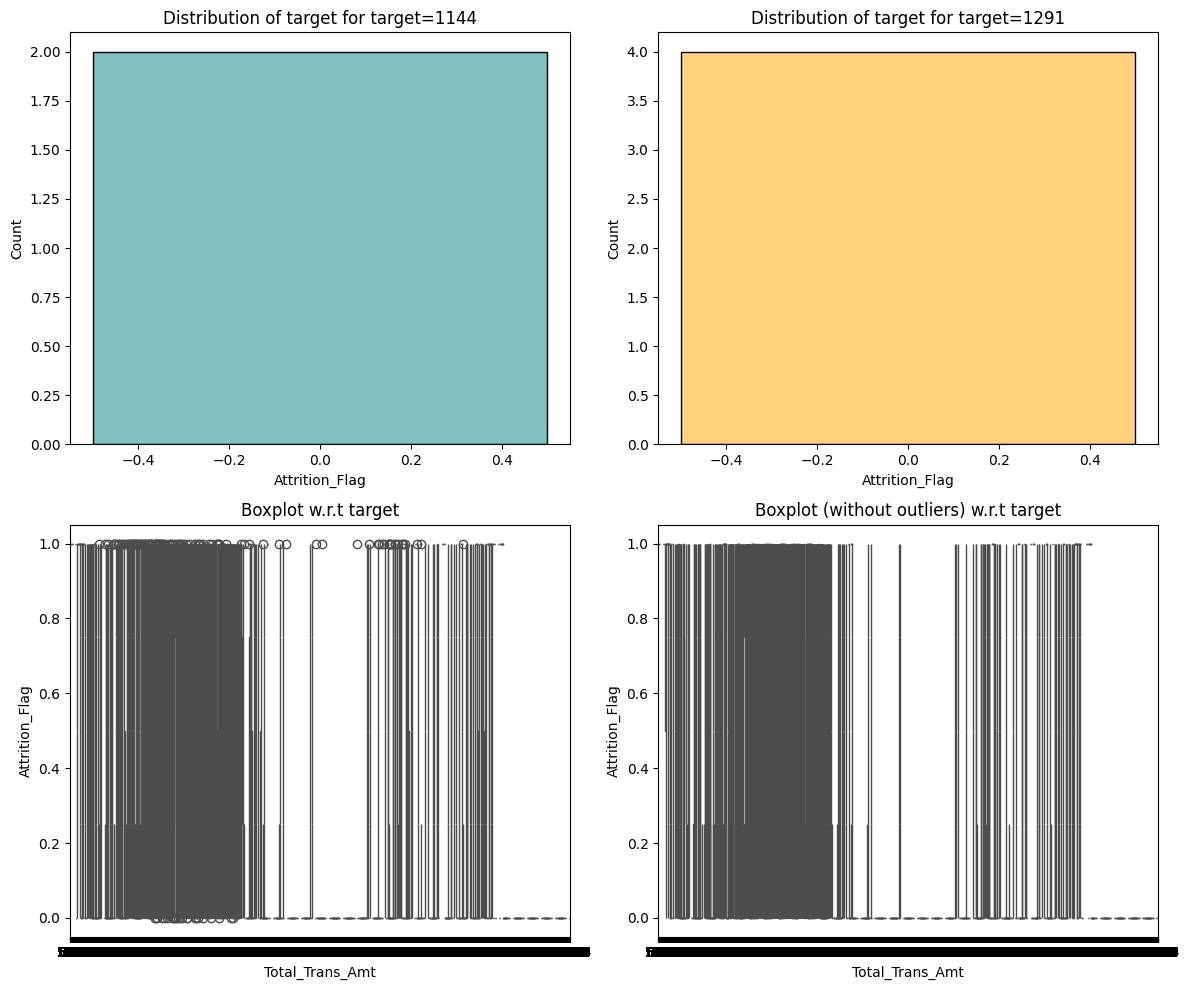

In [ ]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Total_Trans_Amt") ## Complete the code to create distribution_plot for Total_Trans_Amt vs Attrition_Flag

**Let's see the change in transaction amount between Q4 and Q1 (total_ct_change_Q4_Q1) vary by the customer's account status (Attrition_Flag)**

`Total_Ct_Chng_Q4_Q1` vs `Attrition_Flag`

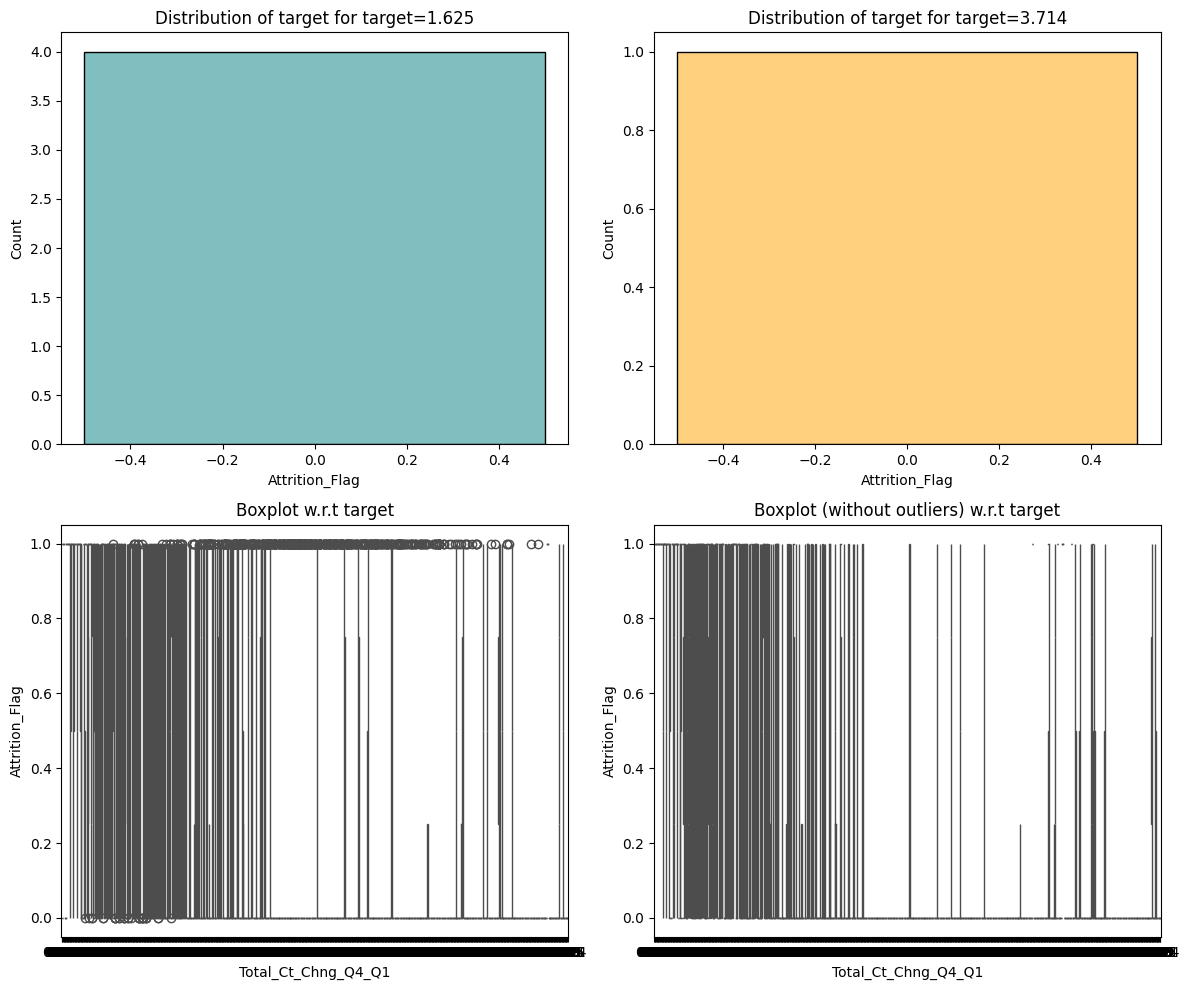

In [ ]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Total_Ct_Chng_Q4_Q1") ## Complete the code to create distribution_plot for Total_Ct_Chng_Q4_Q1 vs Attrition_Flag

`Avg_Utilization_Ratio` vs `Attrition_Flag`

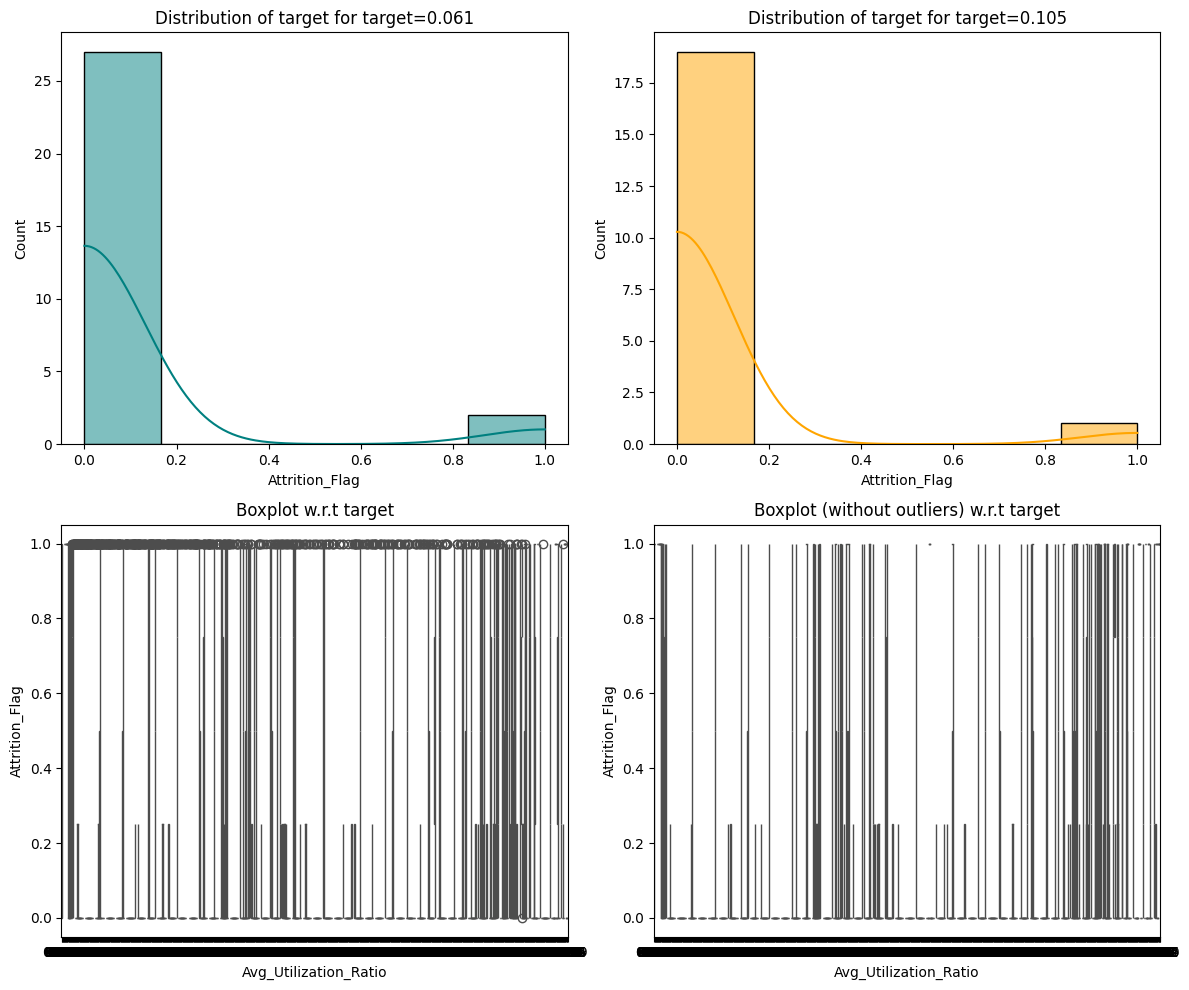

In [ ]:
distribution_plot_wrt_target(data, "Attrition_Flag", "Avg_Utilization_Ratio") ## Complete the code to create distribution_plot for Avg_Utilization_Ratio vs Attrition_Flag


`Attrition_Flag vs Months_on_book`

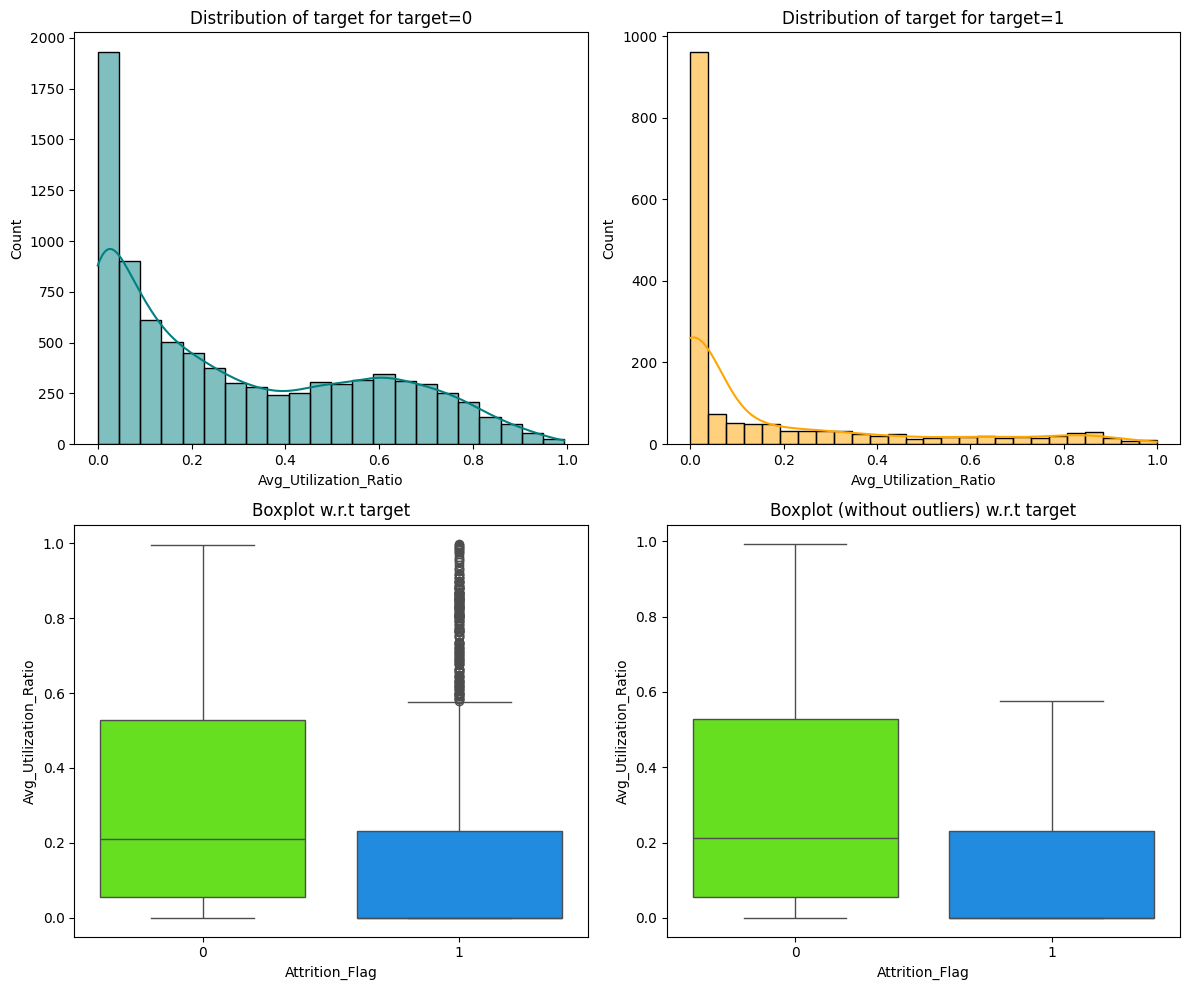

In [ ]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Months_on_book

`Attrition_Flag vs Total_Revolving_Bal`

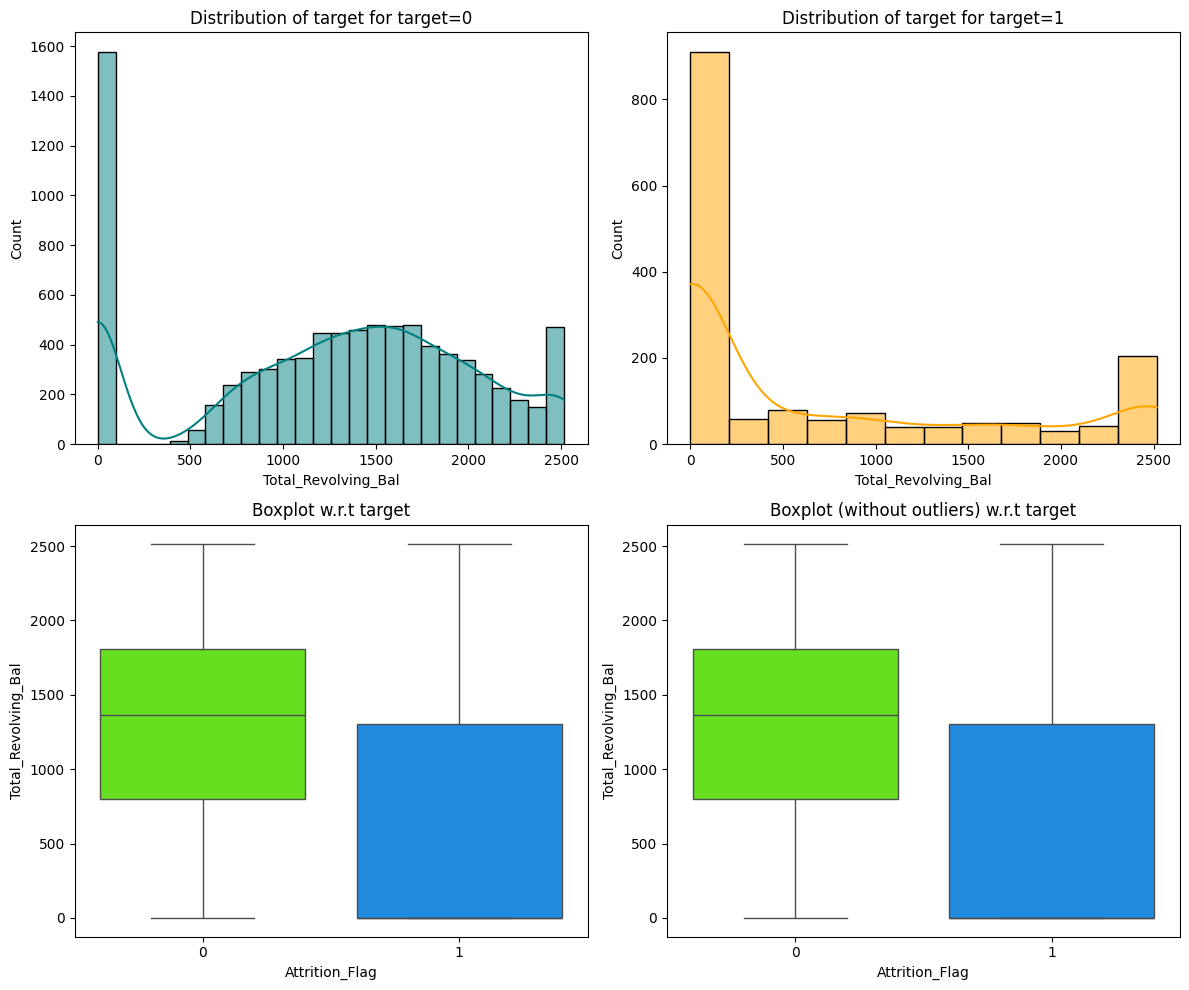

In [ ]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Total_Revolving_Bal

`Attrition_Flag vs Avg_Open_To_Buy`

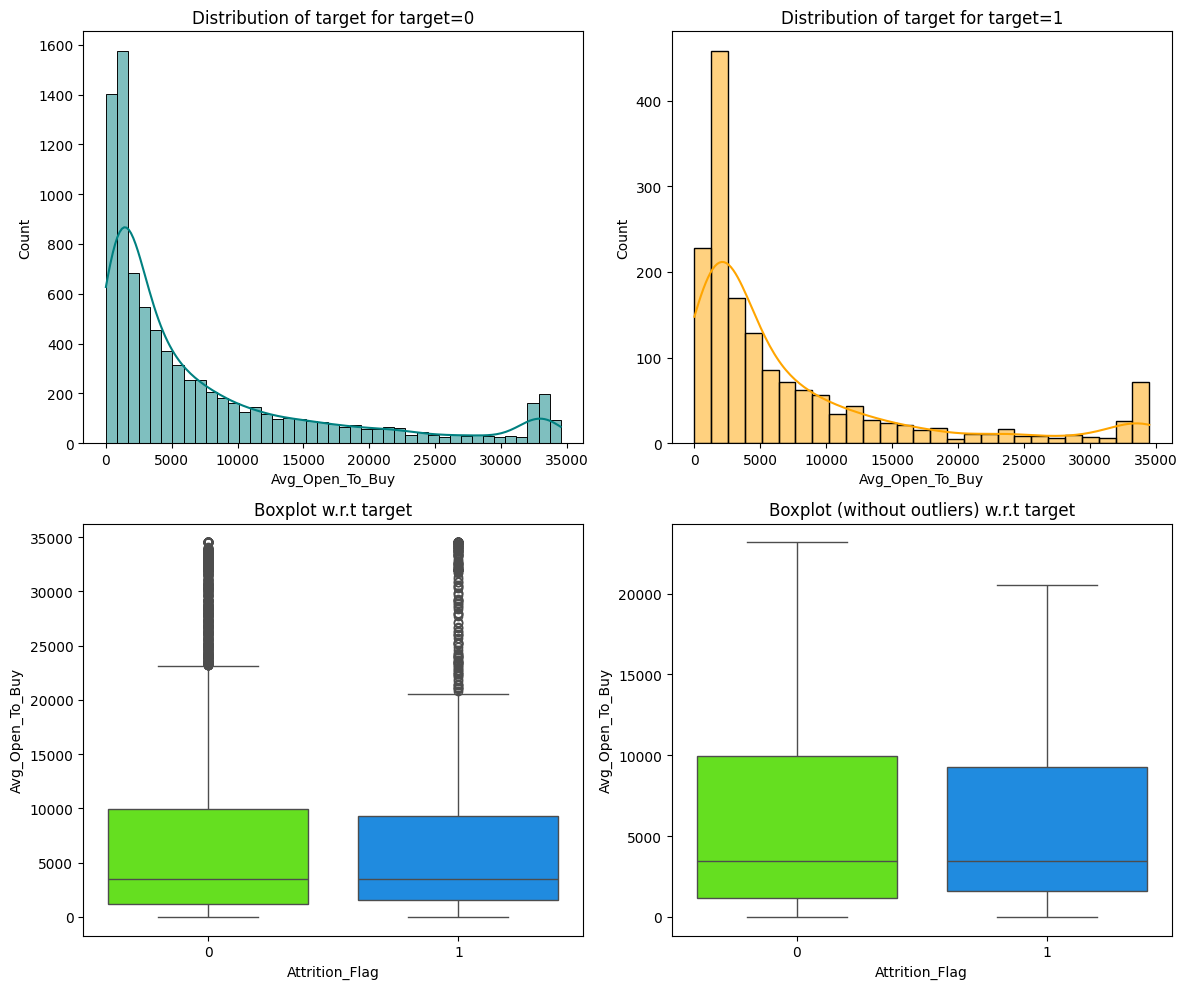

In [ ]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag") ## Complete the code to create distribution_plot for Attrition_Flag vs Avg_Open_To_Buy

## Data Preprocessing

### Outlier Detection

In [ ]:
#print(data.dtypes)
#data[gender] = pd.to_numeric(data[gender], errors='coerce')
#numerical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']  # Replace with actual column names
#for col in numerical_columns:
 #   data[col] = pd.to_numeric(data[col], errors='coerce')
#print(data.dtypes)


data_num=data.select_dtypes(include=["float64", "int64"])
Q1 = data_num.quantile(0.25)  # To find the 25th percentile
Q3 = data_num.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)


In [ ]:
# checking the % outliers
((data.select_dtypes(include=["float64", "int64"]) < lower) | (data.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(data) * 100

,0
Attrition_Flag,16.066
Customer_Age,0.020
Dependent_count,0.000
Months_on_book,3.812
Total_Relationship_Count,0.000
Months_Inactive_12_mon,3.268
Contacts_Count_12_mon,6.211
Credit_Limit,9.717
Total_Revolving_Bal,0.000
Avg_Open_To_Buy,9.509


### Train-Test Split

In [ ]:
# creating the copy of the dataframe
data1 = data.copy()

In [ ]:
data1["Income_Category"].replace("abc", np.nan, inplace=True) ### complete the code to replace the anomalous values with NaN

In [ ]:
data1.isna().sum()

,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,1519
Marital_Status,749
Income_Category,1112
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0


In [ ]:
# creating an instace of the imputer to be used
imputer = SimpleImputer(strategy="most_frequent")

In [ ]:
# Dividing train data into X and y

X = data1.drop(["Attrition_Flag"], axis=1)
y = data1["Attrition_Flag"]

In [ ]:
# Splitting data into training and validation set:

X_train, X_temp, y_train, y_temp = train_test_split(  X, y, test_size=0.2, random_state=1, stratify=y) ## Complete the code to split the data into train test in the ratio 80:20

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp) ## Complete the code to split the data into train test in the ratio 75:25

print(X_train.shape, X_val.shape, X_test.shape)

(8101, 19) (507, 19) (1519, 19)


### Missing value imputation

In [ ]:
reqd_col_for_impute = ["Education_Level", "Marital_Status", "Income_Category"]

In [ ]:
# Fit and transform the train data

X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the validation data
X_val[reqd_col_for_impute]  =  imputer.transform(X_val[reqd_col_for_impute]) ## Complete the code to impute missing values in X_val

# Transform the test data
X_test[reqd_col_for_impute] =  imputer.transform(X_test[reqd_col_for_impute]) ## Complete the code to impute missing values in X_test

In [ ]:
# Let's impute the missing values
#imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
#cols_to_impute = ["Education_Level", "Marital_Status", "Income_Category"]

# fit and transform the imputer on train data
#X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
#X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])

# fit and transform the imputer on test data
#X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

In [ ]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [ ]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    4288
M    3813
Name: count, dtype: int64
******************************
Education_Level
Graduate         3699
High School      1632
Uneducated       1187
College           817
Post-Graduate     413
Doctorate         353
Name: count, dtype: int64
******************************
Marital_Status
Married     4376
Single      3139
Divorced     586
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    3740
$40K - $60K       1420
$80K - $120K      1246
$60K - $80K       1110
$120K +            585
Name: count, dtype: int64
******************************
Card_Category
Blue        7560
Silver       436
Gold          90
Platinum      15
Name: count, dtype: int64
******************************


In [ ]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

Gender
F    260
M    247
Name: count, dtype: int64
******************************
Education_Level
Graduate         246
High School       85
Uneducated        73
College           56
Post-Graduate     27
Doctorate         20
Name: count, dtype: int64
******************************
Marital_Status
Married     292
Single      185
Divorced     30
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    228
$40K - $60K       100
$60K - $80K        75
$80K - $120K       75
$120K +            29
Name: count, dtype: int64
******************************
Card_Category
Blue        468
Silver       30
Gold          8
Platinum      1
Name: count, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

Gender
F    4288
M    3813
Name: count, dtype: int64
******************************
Education_Level
Graduate         3699
High School      1632
Uneducated       1187
College           817
Post-Graduate     413
Doctorate         353
Name: count, dtype: int64
******************************
Marital_Status
Married     4376
Single      3139
Divorced     586
Name: count, dtype: int64
******************************
Income_Category
Less than $40K    3740
$40K - $60K       1420
$80K - $120K      1246
$60K - $80K       1110
$120K +            585
Name: count, dtype: int64
******************************
Card_Category
Blue        7560
Silver       436
Gold          90
Platinum      15
Name: count, dtype: int64
******************************


### Encoding categorical variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_train = X_train.astype('float')

X_val = pd.get_dummies(X_val, drop_first=True)  ## Complete the code to impute missing values in X_val
X_val = X_val.astype('float')

X_test = pd.get_dummies(X_test, drop_first=True)  ## Complete the code to impute missing values in X_val
X_test = X_test.astype('float')

print(X_train.shape, X_val.shape, X_test.shape)

(8101, 29) (507, 29) (1519, 29)


* After encoding there are 29 columns.

In [ ]:
# check the top 5 rows from the train dataset
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_M,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
3105,53.000,2.000,37.000,5.000,3.000,4.000,7282.000,0.000,7282.000,0.740,3364.000,69.000,0.816,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
3721,44.000,4.000,37.000,4.000,3.000,3.000,5826.000,0.000,5826.000,0.689,3756.000,73.000,0.921,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
3389,50.000,3.000,41.000,4.000,2.000,2.000,2563.000,1860.000,703.000,0.680,3774.000,83.000,0.804,0.726,0.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000
3552,50.000,1.000,30.000,6.000,2.000,3.000,9771.000,1776.000,7995.000,0.460,2778.000,53.000,0.472,0.182,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
398,55.000,0.000,49.000,5.000,3.000,3.000,3805.000,2233.000,1572.000,1.095,1743.000,27.000,0.929,0.587,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


## Model Building

### Model evaluation criterion

Model can make wrong predictions as:

- Predicting a customer will attrite and the customer doesn't attrite
- Predicting a customer will not attrite and the customer attrites

Which case is more important?

- Predicting that customer will not attrite but he attrites i.e. losing on a valuable customer or asset.

**How to reduce this loss i.e need to reduce False Negatives??**

- Bank would want Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the bank can retain their valuable customers by identifying the customers who are at risk of attrition.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building - Original Data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GradientBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
##models.append(('XGBoost', XGBClassifier(random_state=1,eval_metric='logloss')))

 ## Complete the code to append remaining 3 models in the list models

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9838709677419355
Random forest: 1.0
GradientBM: 0.8840245775729647
Adaboost: 0.7634408602150538
dtree: 1.0

Validation Performance:

Bagging: 0.8148148148148148
Random forest: 0.7530864197530864
GradientBM: 0.9012345679012346
Adaboost: 0.7530864197530864
dtree: 0.8024691358024691


### Model Building - Oversampled Data

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 1302
Before Oversampling, counts of label 'No': 6799 

After Oversampling, counts of label 'Yes': 6799
After Oversampling, counts of label 'No': 6799 

After Oversampling, the shape of train_X: (13598, 29)
After Oversampling, the shape of train_y: (13598,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GradientBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
 ## Complete the code to append remaining 3 models in the list models


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))  ## Complete the code to build models on oversampled data
    print("{}: {}".format(name, scores))



print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.998529195469922
Random forest: 1.0
GradientBM: 0.9816149433740256
Adaboost: 0.9545521400205913
dtree: 1.0

Validation Performance:

Bagging: 0.8888888888888888
Random forest: 0.8395061728395061
GradientBM: 0.9012345679012346
Adaboost: 0.8148148148148148
dtree: 0.8148148148148148


### Model Building - Undersampled Data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 1302
Before Under Sampling, counts of label 'No': 6799 

After Under Sampling, counts of label 'Yes': 1302
After Under Sampling, counts of label 'No': 1302 

After Under Sampling, the shape of train_X: (2604, 29)
After Under Sampling, the shape of train_y: (2604,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GradientBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))
'_______' ## Complete the code to append remaining 3 models in the list models


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))  ## Complete the code to build models on undersampled data
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9946236559139785
Random forest: 1.0
GradientBM: 0.9823348694316436
Adaboost: 0.9531490015360983
dtree: 1.0

Validation Performance:

Bagging: 0.9382716049382716
Random forest: 0.9506172839506173
GradientBM: 0.9382716049382716
Adaboost: 0.9259259259259259
dtree: 0.9135802469135802


### Hyperparameter Tuning

#### **Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase
2. The models chosen in this notebook are based on test runs. One can update the best models as obtained upon code execution and tune them for best performance.



#### Tuning RandomForest using Undersampled data

In [ ]:
%%time

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "min_samples_leaf": np.arange(1,4),
    "max_features": [np.arange(0.3,0.6,0.1),"sqrt"],
    "max_samples" : np.arange(0.4,0.7,0.1)
    }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'min_samples_leaf': 2, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.945473032714412:
CPU times: user 1.24 s, sys: 239 ms, total: 1.48 s
Wall time: 35.7 s


In [ ]:
# Creating new pipeline with best parameters
tuned_RF = RandomForestClassifier( random_state=1,
    n_estimators= 100, min_samples_leaf=2, max_samples=0.6, max_features='sqrt')
 ## Complete the code with the best parameters obtained from tuning

tuned_RF.fit(X_train_un, y_train_un) ## Complete the code to fit the model on undersampled data

RandomForestClassifier(max_samples=0.6, min_samples_leaf=2, random_state=1)

In [ ]:
RF_train = model_performance_classification_sklearn(tuned_RF, X_train_un, y_train_un) ## Complete the code to check the performance on training set
RF_train

,Accuracy,Recall,Precision,F1
0,0.989,0.996,0.982,0.989


In [ ]:
# Checking model's performance on validation set
RF_val =  model_performance_classification_sklearn(tuned_RF, X_val, y_val) ## Complete the code to check the performance on validation set
RF_val

,Accuracy,Recall,Precision,F1
0,0.929,0.963,0.703,0.812


#### Tuning AdaBoost using undersampled data

In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9431535514294135:


In [ ]:
# Creating new pipeline with best parameters
tuned_ada = AdaBoostClassifier( random_state=1,
    n_estimators= 100, learning_rate= 0.1, estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
) ## Complete the code with the best parameters obtained from tuning

tuned_ada.fit(X_train_un,y_train_un) ## Complete the code to fit the model on original data

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

In [ ]:
ada_train = model_performance_classification_sklearn(tuned_ada, X_train_un, y_train_un) ## Complete the code to check the performance on training set
ada_train

,Accuracy,Recall,Precision,F1
0,0.954,0.964,0.944,0.954


In [ ]:
# Checking model's performance on validation set
bag_val =  model_performance_classification_sklearn(tuned_ada, X_val, y_val) ## Complete the code to check the performance on validation set
bag_val

,Accuracy,Recall,Precision,F1
0,0.931,0.938,0.717,0.813


#### Tuning Gradient Boosting using undersampled data

In [ ]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on under sampled data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 75, 'max_features': 0.7, 'learning_rate': 0.1, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9508429118773947:
CPU times: user 3.03 s, sys: 267 ms, total: 3.29 s
Wall time: 2min 26s


In [ ]:
# Creating new pipeline with best parameters
tuned_gbm1 = GradientBoostingClassifier(
    max_features=0.7,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=0.1,
    n_estimators=75,
    subsample=0.9,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm1.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, n_estimators=75, random_state=1,
                           subsample=0.9)

In [ ]:
gbm1_train = model_performance_classification_sklearn(tuned_gbm1, X_train_un,y_train_un) ## Complete the code to check the performance on undersampled train set
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.969,0.975,0.962,0.969


In [ ]:
gbm1_val = model_performance_classification_sklearn(tuned_gbm1,X_val,y_val) ## Complete the code to check the performance on validation set
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.949,0.951,0.778,0.856


#### Tuning Gradient Boosting using original data

In [ ]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.'_______' ## Complete the code to fit the model on original data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_gbm2 = GradientBoostingClassifier(
    max_features=_______,
    init=AdaBoostClassifier(random_state=1),
    random_state=1,
    learning_rate=_______,
    n_estimators=_______,
    subsample=_______,
)## Complete the code with the best parameters obtained from tuning

tuned_gbm2.fit(X_train, y_train)

#### Tuning Gradient Boosting using over sampled data

In [ ]:
gbm2_train = '_______' ## Complete the code to check the performance on oversampled train set
gbm2_train

In [ ]:
gbm2_val = '_______' ## Complete the code to check the performance on validation set
gbm2_val

#### Tuning XGBoost Model with Original data

**Note**: This section is optional. You can choose not to build XGBoost if you are facing issues with installation or if it is taking more time to execute.



In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.'_______' ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=____,
    scale_pos_weight=____,
    n_estimators=____,
    learning_rate=______,
    gamma=1,
)## Complete the code with the best parameters obtained from tuning

tuned_xgb.fit(X_train, y_train)

In [ ]:
xgb_train = '_______' ## Complete the code to check the performance on original train set
xgb_train

In [ ]:
xgb_val = '_______' ## Complete the code to check the performance on validation set
xgb_val

## Model Comparison and Final Model Selection

**Note**: If you want to include XGBoost model for final model selection, you need to add **xgb_train.T** in the training performance comparison list and **xgb_val.T** in the validation performance comparison list below.

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        RF_train.T,
        ada_train.T,
        gbm1_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "random forest trained with Undersampled data",
    "AdaBoost  trained with Undersampled data",
    "gradient Boost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,random forest trained with Undersampled data,AdaBoost trained with Undersampled data,gradient Boost trained with Undersampled data
Accuracy,0.989,0.954,0.969
Recall,0.996,0.964,0.975
Precision,0.982,0.944,0.962
F1,0.989,0.954,0.969


In [ ]:
# validation performance comparison

models_train_comp_df = pd.concat(
    [
        RF_val.T,
        bag_val.T,
        gbm1_val.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "random forest trained with validation data",
    "AdaBoost  trained with validation data",
    "gradient Boost trained with validation data",
]
print("Training performance comparison:")
models_train_comp_df ## Write the code to compare the performance on validation set

Training performance comparison:


,random forest trained with validation data,AdaBoost trained with validation data,gradient Boost trained with validation data
Accuracy,0.929,0.931,0.949
Recall,0.963,0.938,0.951
Precision,0.703,0.717,0.778
F1,0.812,0.813,0.856


**Now we have our final model, so let's find out how our final model is performing on unseen test data.**

In [ ]:
# Let's check the performance on test set
ada_test =  model_performance_classification_sklearn(tuned_ada, X_test, y_test)
RF_test =  model_performance_classification_sklearn(tuned_RF, X_test, y_test)
gbm1_test =  model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
 ## Write the code to check the performance of best model on test data

models_train_comp_df1 = pd.concat(
    [
        RF_test.T,
        ada_test.T,
        gbm1_test.T,
    ],
    axis=1,
)
models_train_comp_df1.columns = [
    "random forest trained with test data",
    "AdaBoost  trained with test data",
    "gradient Boost trained with test data",
]
print("Training performance comparison:")
models_train_comp_df1 ## Write the code to compare the performance on validation set

Training performance comparison:


,random forest trained with test data,AdaBoost trained with test data,gradient Boost trained with test data
Accuracy,0.925,0.928,0.935
Recall,0.971,0.975,0.975
Precision,0.689,0.698,0.721
F1,0.806,0.814,0.829


### Feature Importances

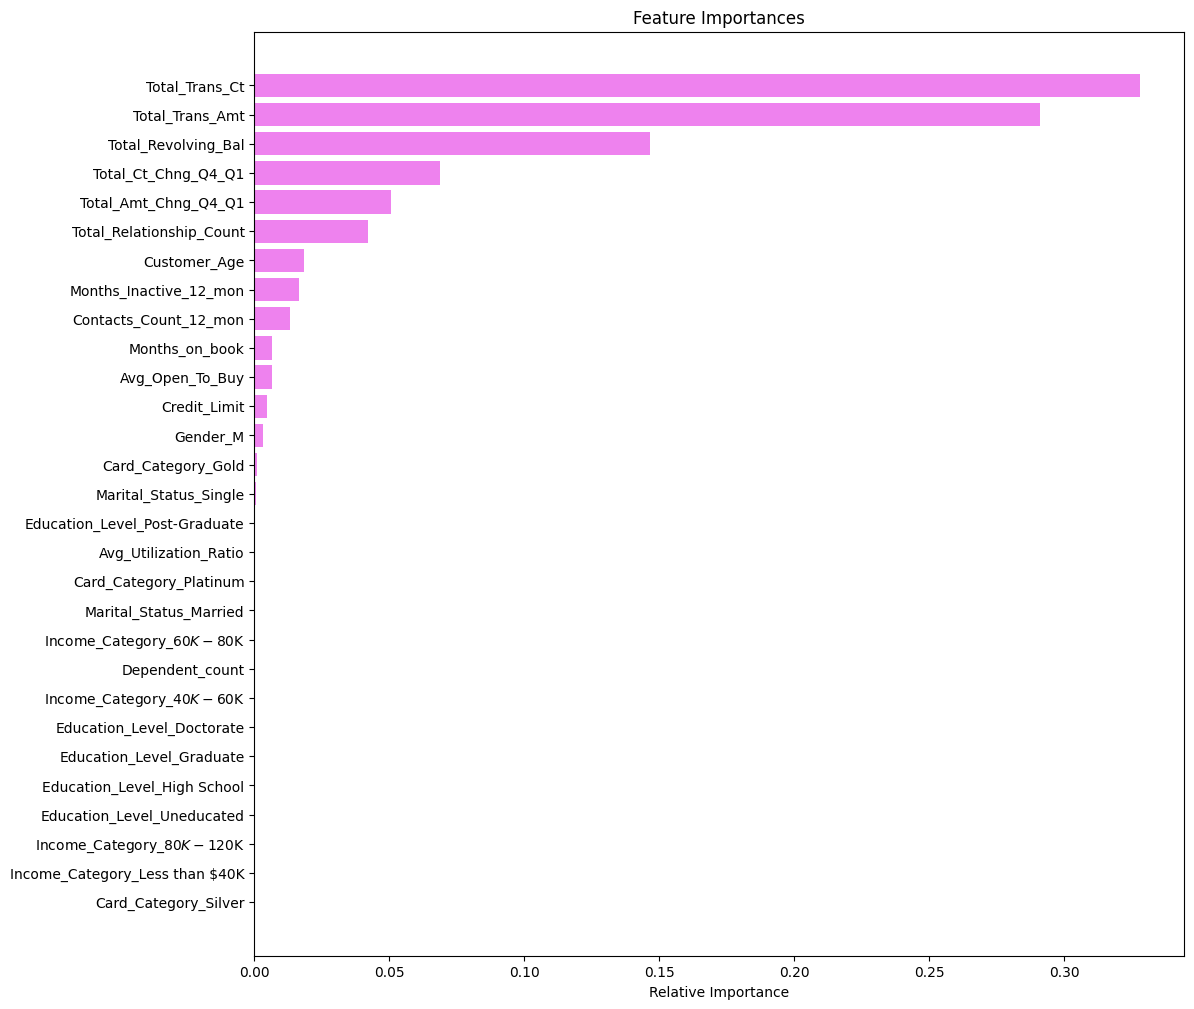

In [ ]:
feature_names = X_train.columns
importances =  tuned_gbm1.feature_importances_ ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions


-


***